In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set styles and configurations
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

# Load the dataset
df = pd.read_csv('ai_assistant_usage_student_life.csv')

print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()


Dataset loaded successfully: 10000 rows, 11 columns


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


# StudentLevel

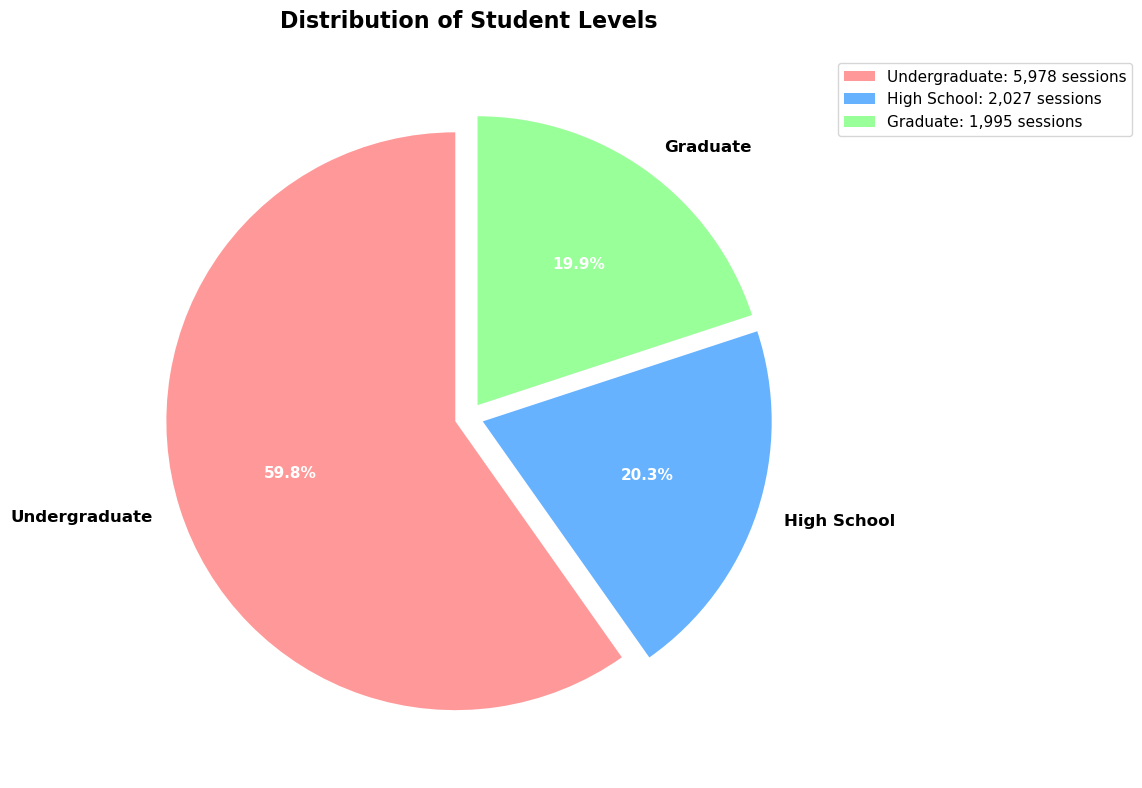

In [2]:
# ============================================================
# Visualization 1: Student Level Distribution (Pie Chart)
# ============================================================

fig, ax = plt.subplots(figsize=(10, 8))

# Calculate distribution
student_dist = df['StudentLevel'].value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99']
explode = (0.05, 0.05, 0.05)  # Slightly separate all slices

# Create pie chart
wedges, texts, autotexts = ax.pie(
    student_dist.values, 
    labels=student_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Enhance autotext
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

ax.set_title('Distribution of Student Levels', fontsize=16, weight='bold', pad=20)

# Add legend with counts
legend_labels = [f'{level}: {count:,} sessions' for level, count in student_dist.items()]
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.tight_layout()
plt.show()


The pie chart illustrates the distribution of student academic levels, with undergraduates constituting the largest proportion at 59.8% (5,978 sessions), followed by high school students at 20.3% (2,027 sessions) and graduate students at 19.9% (1,995 sessions). Overall, undergraduate students represent the primary user group in this usage scenario.

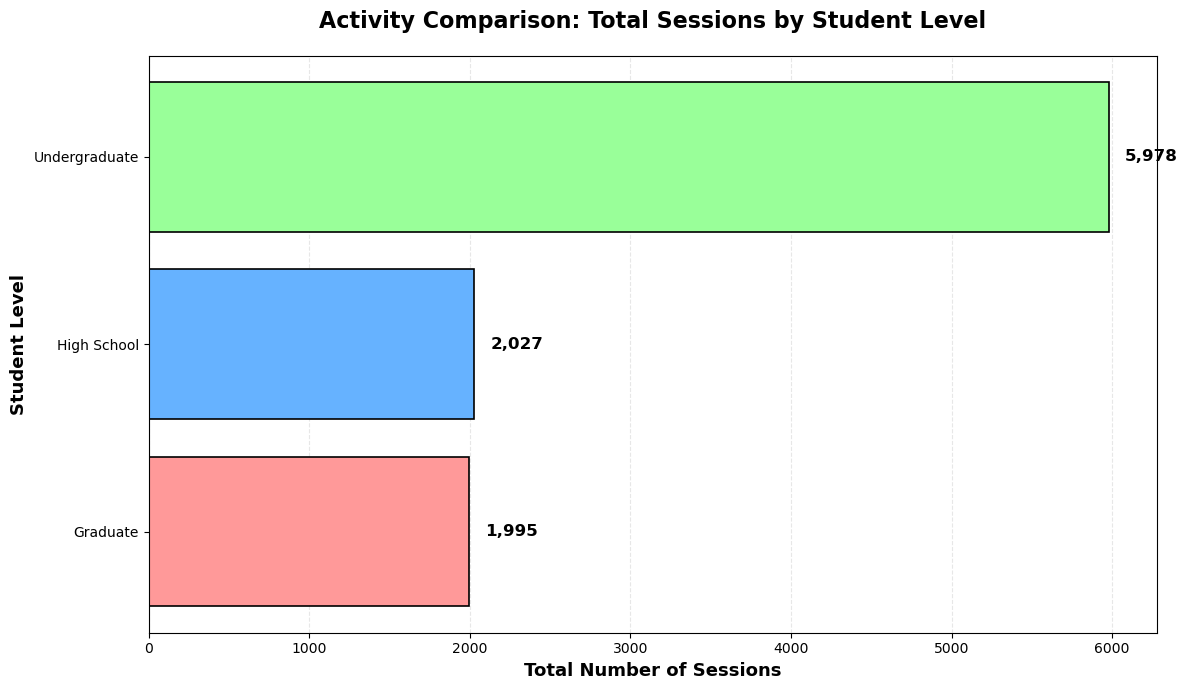

In [3]:
# ============================================================
# Visualization 2: Activity Comparison by Student Level (Bar Chart)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Calculate session counts
session_counts = df['StudentLevel'].value_counts().sort_values(ascending=True)

# Create horizontal bar chart
bars = ax.barh(session_counts.index, session_counts.values, 
               color=['#FF9999', '#66B2FF', '#99FF99'], 
               edgecolor='black', linewidth=1.2)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, session_counts.values)):
    ax.text(value + 100, bar.get_y() + bar.get_height()/2, 
            f'{value:,}', 
            va='center', ha='left', fontsize=12, weight='bold')

ax.set_xlabel('Total Number of Sessions', fontsize=13, weight='bold')
ax.set_ylabel('Student Level', fontsize=13, weight='bold')
ax.set_title('Activity Comparison: Total Sessions by Student Level', 
             fontsize=16, weight='bold', pad=20)

# Add grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


The bar chart displays the total session counts across different student academic levels. Undergraduate students generated the highest number of sessions (5,978), while high school students (2,027) and graduate students (1,995) showed comparable session volumes that were substantially lower than the undergraduate cohort.

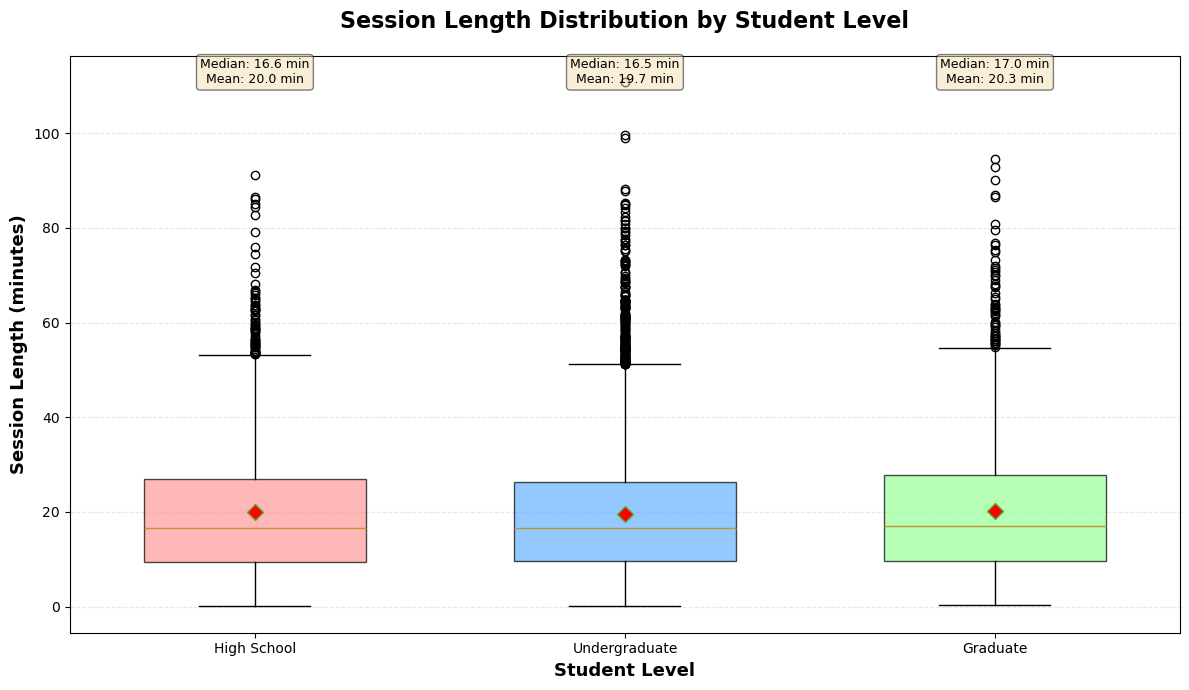

In [4]:
# ============================================================
# Visualization 3: Session Length Distribution by Student Level (Box Plot)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Define order and colors
order = ['High School', 'Undergraduate', 'Graduate']
colors_palette = {'High School': '#FF9999', 'Undergraduate': '#66B2FF', 'Graduate': '#99FF99'}

# Create box plot
bp = ax.boxplot([df[df['StudentLevel'] == level]['SessionLengthMin'].values for level in order],
                 labels=order,
                 patch_artist=True,
                 widths=0.6,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
for patch, level in zip(bp['boxes'], order):
    patch.set_facecolor(colors_palette[level])
    patch.set_alpha(0.7)

# Calculate and display statistics
for i, level in enumerate(order, 1):
    data = df[df['StudentLevel'] == level]['SessionLengthMin']
    median_val = data.median()
    mean_val = data.mean()
    ax.text(i, ax.get_ylim()[1] * 0.95, 
            f'Median: {median_val:.1f} min\nMean: {mean_val:.1f} min',
            ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_xlabel('Student Level', fontsize=13, weight='bold')
ax.set_ylabel('Session Length (minutes)', fontsize=13, weight='bold')
ax.set_title('Session Length Distribution by Student Level', fontsize=16, weight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


The box plot illustrates the distribution of session durations across different student academic levels. The median session durations for high school students (16.6 min), undergraduates (16.5 min), and graduate students (17.0 min), along with their respective mean values (20.0 min, 19.7 min, 20.3 min), demonstrate minimal variation. These patterns indicate remarkably similar overall characteristics in session duration distributions among all three student groups.

# Discipline

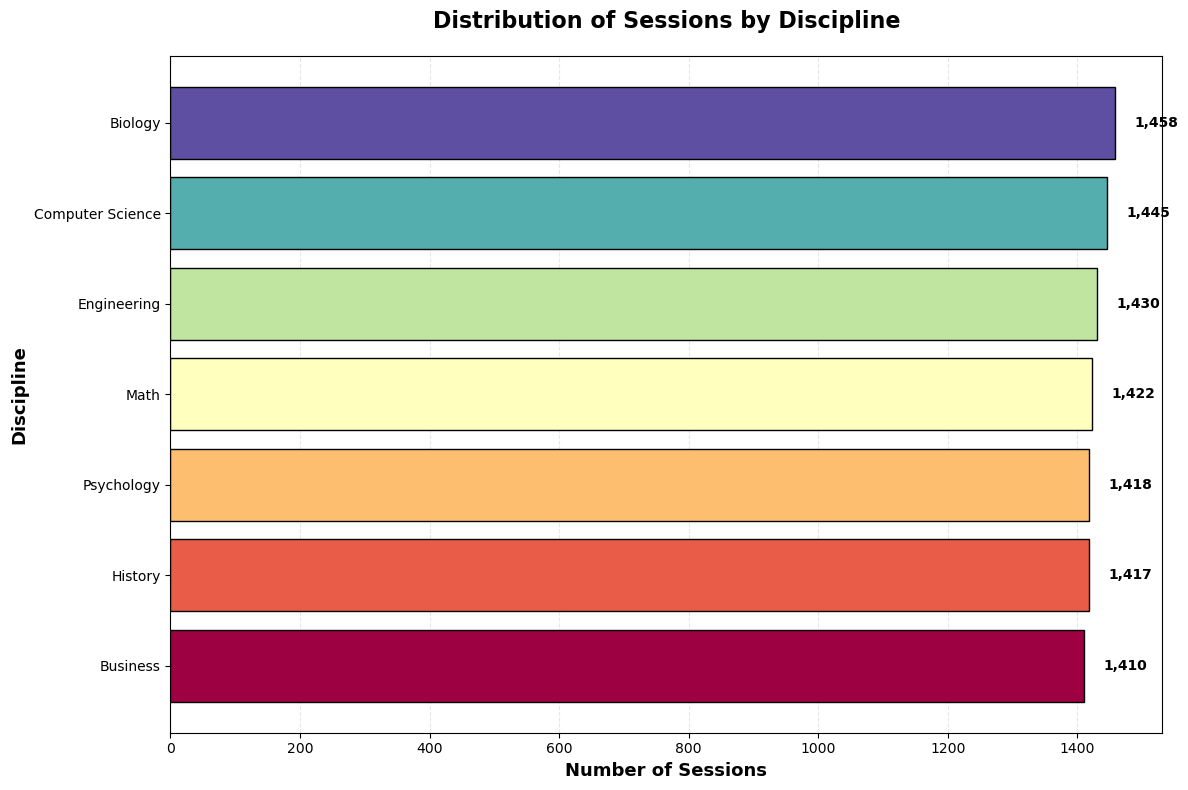

In [ ]:
# ============================================================
# Visualization 1: Discipline Distribution (Horizontal Bar Chart)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 8))

# Calculate discipline distribution
discipline_counts = df['Discipline'].value_counts().sort_values(ascending=True)

# Create color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(discipline_counts)))

# Create horizontal bar chart
bars = ax.barh(discipline_counts.index, discipline_counts.values, 
               color=colors, edgecolor='black', linewidth=1)

# Add value labels
for bar, value in zip(bars, discipline_counts.values):
    ax.text(value + 30, bar.get_y() + bar.get_height()/2, 
            f'{value:,}', 
            va='center', ha='left', fontsize=10, weight='bold')

ax.set_xlabel('Number of Sessions', fontsize=13, weight='bold')
ax.set_ylabel('Discipline', fontsize=13, weight='bold')
ax.set_title('Distribution of Sessions by Discipline', fontsize=16, weight='bold', pad=20)

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


This bar chart displays the distribution of session counts across academic disciplines. Biology records the highest number of sessions (1,458), while Business shows the lowest count (1,410), with minimal variation observed among all disciplines.

# SessionLengthMin

This chapter investigates the determinants of student-AI interaction duration (in minutes).

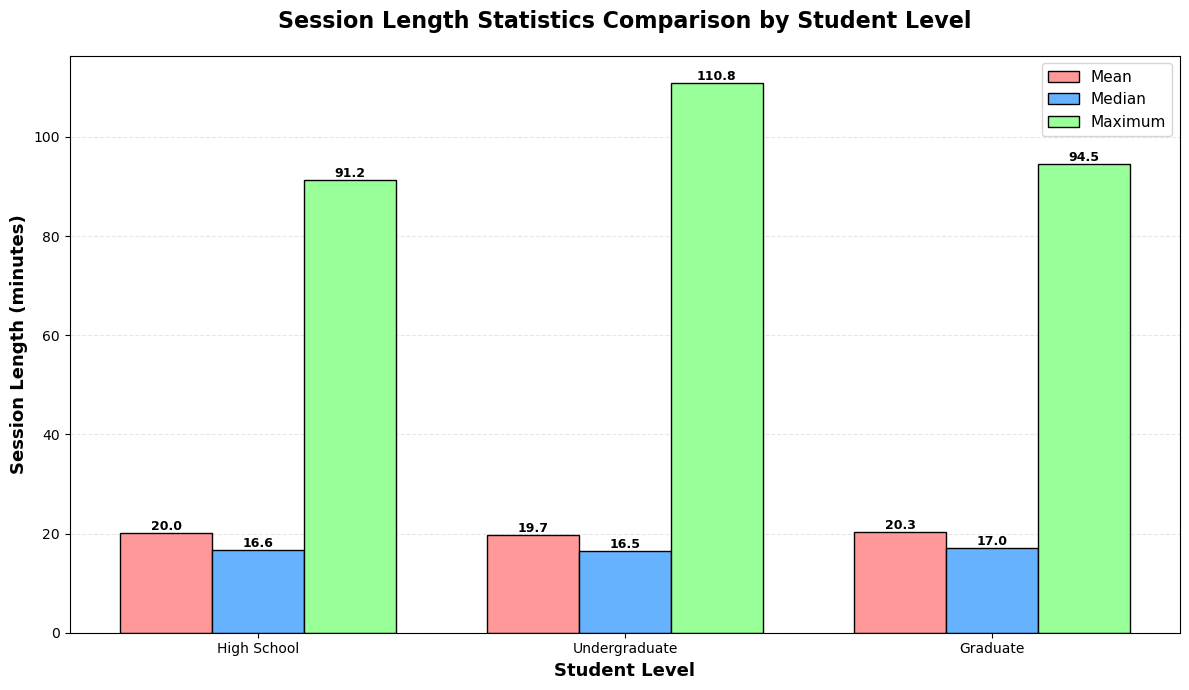

In [ ]:
# ============================================================
# Visualization 1: Session Length Comparison by Student Level (Grouped Bar Chart)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Calculate statistics by student level
student_levels = ['High School', 'Undergraduate', 'Graduate']
stats_data = []

for level in student_levels:
    level_data = df[df['StudentLevel'] == level]['SessionLengthMin']
    stats_data.append({
        'Level': level,
        'Mean': level_data.mean(),
        'Median': level_data.median(),
        'Max': level_data.max()
    })

stats_df = pd.DataFrame(stats_data)

# Set up bar positions
x = np.arange(len(student_levels))
width = 0.25

# Create grouped bars
bars1 = ax.bar(x - width, stats_df['Mean'], width, label='Mean', color='#FF9999', edgecolor='black')
bars2 = ax.bar(x, stats_df['Median'], width, label='Median', color='#66B2FF', edgecolor='black')
bars3 = ax.bar(x + width, stats_df['Max'], width, label='Maximum', color='#99FF99', edgecolor='black')

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9, weight='bold')

ax.set_xlabel('Student Level', fontsize=13, weight='bold')
ax.set_ylabel('Session Length (minutes)', fontsize=13, weight='bold')
ax.set_title('Session Length Statistics Comparison by Student Level', fontsize=16, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(student_levels)
ax.legend(loc='upper right', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


This figure analyzes the impact of academic level (high school, undergraduate, graduate) on interaction duration with AI assistants, presenting session length statistics (mean, median, maximum) across student categories. The three groups show minimal differences in mean and median values (all approximately 20 minutes), indicating comparable interaction durations across academic levels. However, undergraduate students demonstrate a significantly longer maximum session duration (110.8 minutes) compared to high school and graduate students.

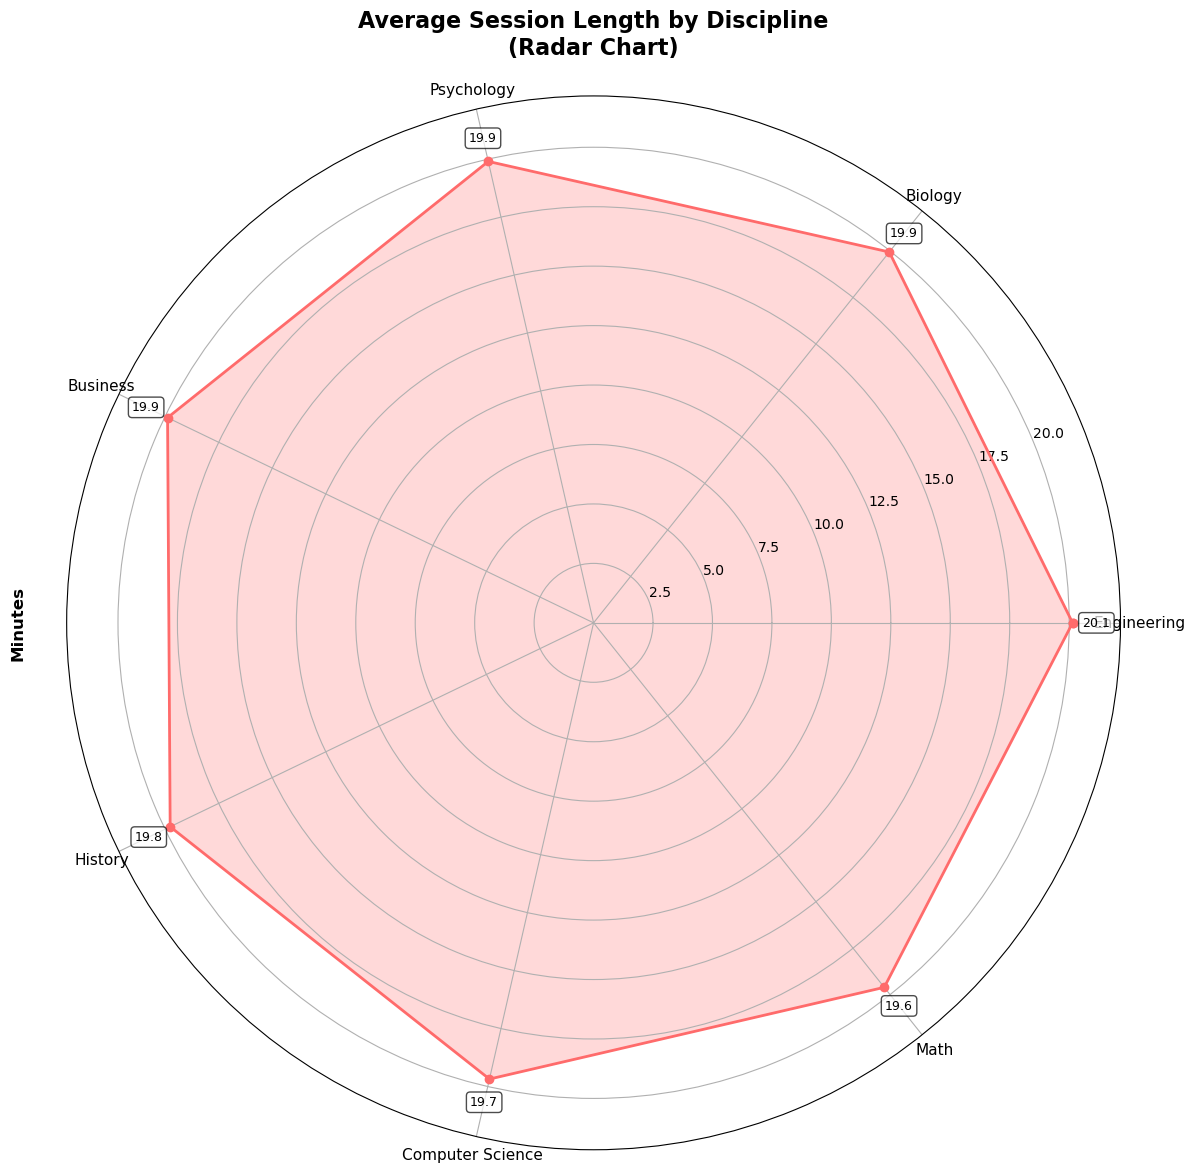

In [ ]:
# ============================================================
# Visualization 2: Average Session Length by Discipline (Radar Chart)
# ============================================================

# Calculate average session length by discipline
avg_length_by_discipline = df.groupby('Discipline')['SessionLengthMin'].mean().sort_values(ascending=False)

# Prepare data for radar chart
categories = avg_length_by_discipline.index.tolist()
values = avg_length_by_discipline.values.tolist()

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
values += values[:1]  # Complete the circle
angles += angles[:1]

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Draw the plot
ax.plot(angles, values, 'o-', linewidth=2, color='#FF6B6B', label='Avg Session Length')
ax.fill(angles, values, alpha=0.25, color='#FF6B6B')

# Fix axis to go in the right order
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11)

# Set y-axis label
ax.set_ylabel('Minutes', fontsize=12, weight='bold', labelpad=30)
ax.set_ylim(0, max(values) * 1.1)

# Add title
ax.set_title('Average Session Length by Discipline\n(Radar Chart)', 
             fontsize=16, weight='bold', pad=30)

# Add value labels
for angle, value, category in zip(angles[:-1], values[:-1], categories):
    ax.text(angle, value + 1, f'{value:.1f}', 
            ha='center', va='center', fontsize=9, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


This radar chart illustrates average session durations across academic disciplines, revealing Engineering with the highest mean duration (20.1 minutes) and Mathematics the lowest (19.6 minutes). The remaining disciplines (Biology, Psychology, Business, etc.) exhibit negligible variations. This visualization analyzes the influence of disciplinary backgrounds on student-AI interaction duration, demonstrating that academic discipline exerts minimal impact on engagement time overall.

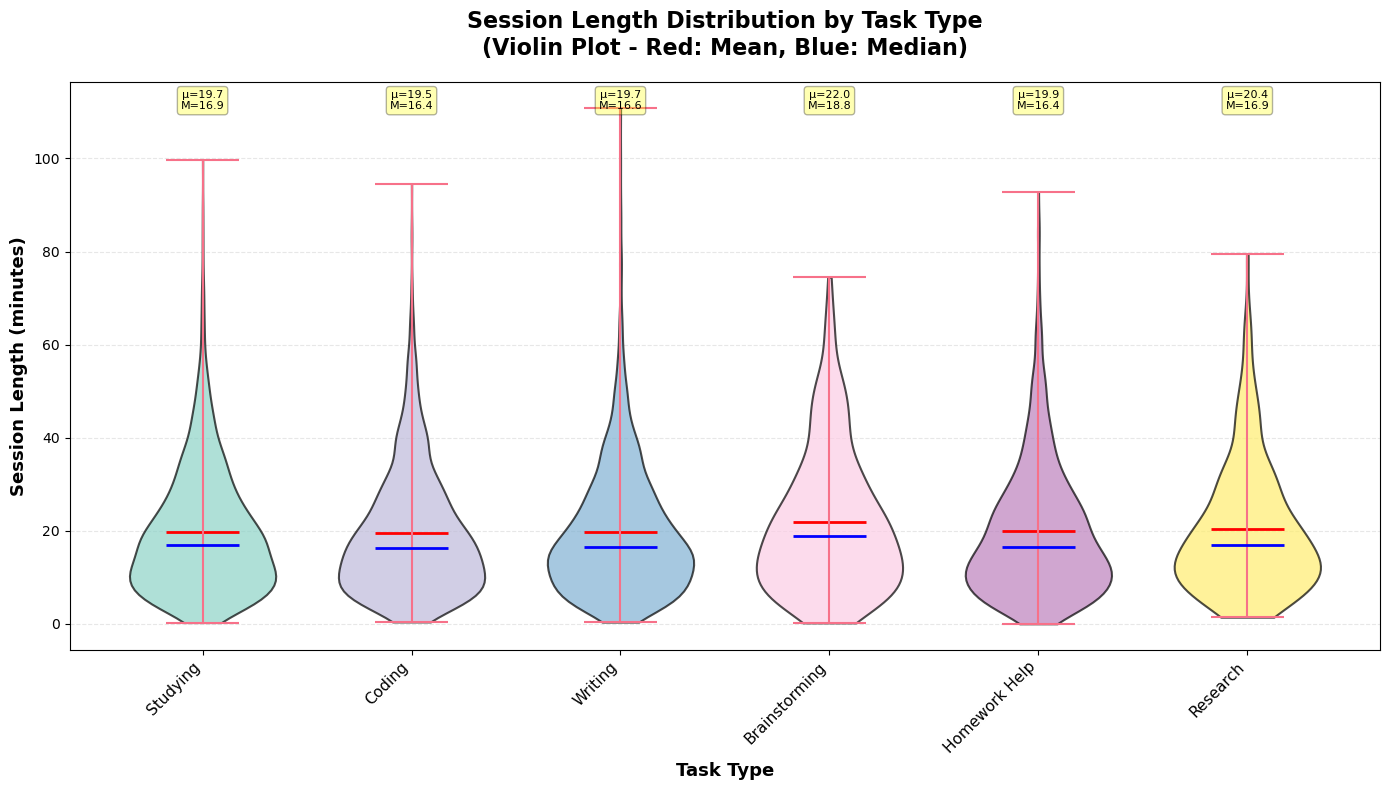

In [ ]:
# ============================================================
# Visualization 3: Session Length Distribution by Task Type (Violin Plot)
# ============================================================

fig, ax = plt.subplots(figsize=(14, 8))

# Get unique task types
task_types = df['TaskType'].unique()

# Prepare data for violin plot
data_by_task = [df[df['TaskType'] == task]['SessionLengthMin'].values for task in task_types]

# Create violin plot
parts = ax.violinplot(data_by_task, positions=range(len(task_types)), 
                      showmeans=True, showmedians=True, widths=0.7)

# Customize violin colors
colors = plt.cm.Set3(np.linspace(0, 1, len(task_types)))
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Customize other elements
parts['cmeans'].set_color('red')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_color('blue')
parts['cmedians'].set_linewidth(2)

# Set labels and title
ax.set_xticks(range(len(task_types)))
ax.set_xticklabels(task_types, rotation=45, ha='right', fontsize=11)
ax.set_xlabel('Task Type', fontsize=13, weight='bold')
ax.set_ylabel('Session Length (minutes)', fontsize=13, weight='bold')
ax.set_title('Session Length Distribution by Task Type\n(Violin Plot - Red: Mean, Blue: Median)', 
             fontsize=16, weight='bold', pad=20)

# Add statistics text
for i, task in enumerate(task_types):
    task_data = df[df['TaskType'] == task]['SessionLengthMin']
    mean_val = task_data.mean()
    median_val = task_data.median()
    ax.text(i, ax.get_ylim()[1] * 0.95, 
            f'μ={mean_val:.1f}\nM={median_val:.1f}',
            ha='center', fontsize=8, 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


This violin plot analyzes the impact of task type on student-AI interaction duration. While brainstorming tasks show a slightly higher average duration (22.0 minutes) and coding tasks a marginally lower average (19.5 minutes), the overall distributions reveal minimal differences in both mean and median values across task categories. This pattern suggests that task type exerts limited influence on interaction duration.

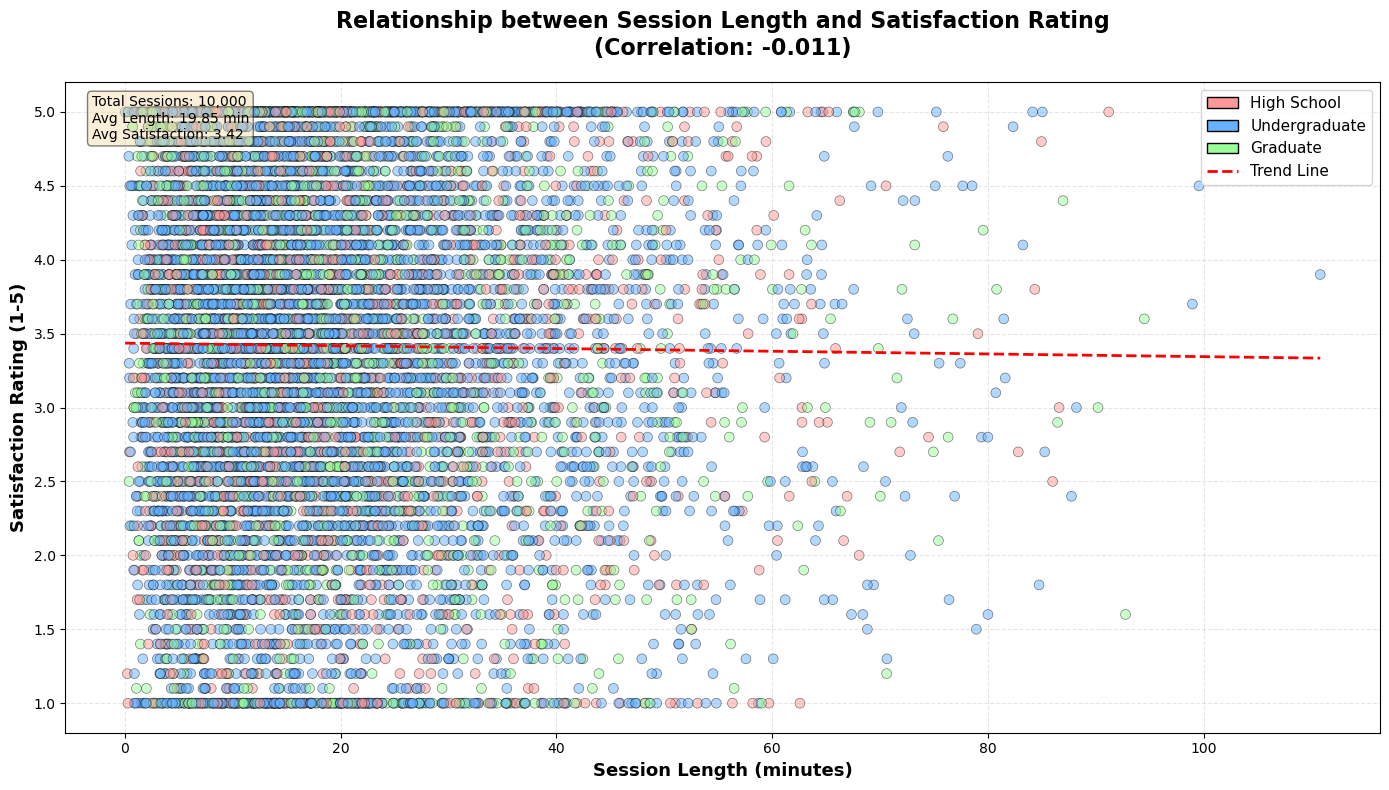

In [ ]:
# ============================================================
# Visualization 4: Session Length vs Satisfaction Rating (Scatter Plot)
# ============================================================

fig, ax = plt.subplots(figsize=(14, 8))

# Create color map based on student level
color_map = {'High School': '#FF9999', 'Undergraduate': '#66B2FF', 'Graduate': '#99FF99'}
colors = df['StudentLevel'].map(color_map)

# Create scatter plot
scatter = ax.scatter(df['SessionLengthMin'], df['SatisfactionRating'], 
                     c=colors, alpha=0.5, s=50, edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df['SessionLengthMin'], df['SatisfactionRating'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['SessionLengthMin'].min(), df['SessionLengthMin'].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", linewidth=2, label=f'Trend Line: y={z[0]:.4f}x+{z[1]:.2f}')

# Calculate correlation
correlation = df['SessionLengthMin'].corr(df['SatisfactionRating'])

# Set labels and title
ax.set_xlabel('Session Length (minutes)', fontsize=13, weight='bold')
ax.set_ylabel('Satisfaction Rating (1-5)', fontsize=13, weight='bold')
ax.set_title(f'Relationship between Session Length and Satisfaction Rating\n(Correlation: {correlation:.3f})', 
             fontsize=16, weight='bold', pad=20)

# Add legend for student levels
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[level], edgecolor='black', label=level) 
                   for level in ['High School', 'Undergraduate', 'Graduate']]
legend_elements.append(plt.Line2D([0], [0], color='r', linestyle='--', linewidth=2, label='Trend Line'))

ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add statistical annotation
ax.text(0.02, 0.98, 
        f'Total Sessions: {len(df):,}\n'
        f'Avg Length: {df["SessionLengthMin"].mean():.2f} min\n'
        f'Avg Satisfaction: {df["SatisfactionRating"].mean():.2f}',
        transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


This figure analyzes the relationship between session duration and satisfaction ratings regarding its impact on student-AI interaction length. The correlation coefficient between these variables is -0.011, indicating virtually no meaningful association. This demonstrates that satisfaction ratings have negligible influence on interaction duration.

# SessionDate

This chapter examines the temporal usage patterns of students when interacting with AI assistants.

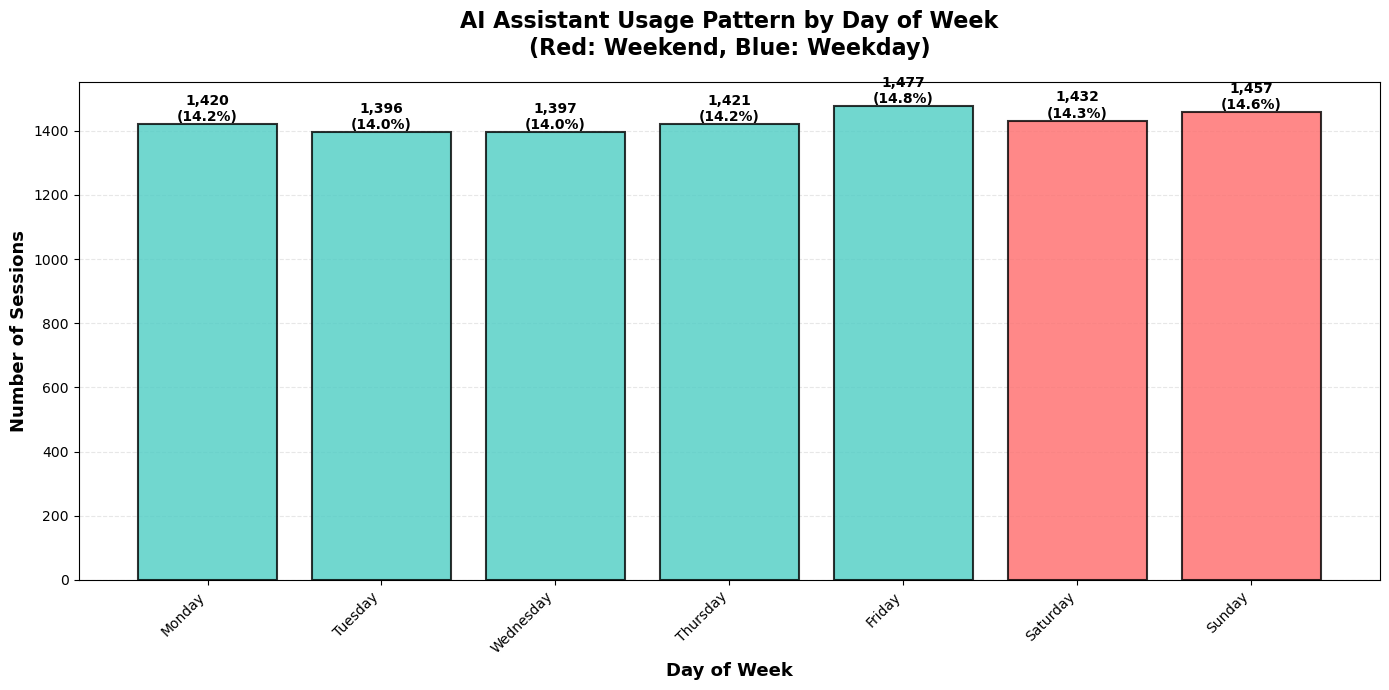

In [ ]:
# ============================================================
# Visualization 1: Weekly Pattern (Bar Chart)
# ============================================================

df['SessionDate'] = pd.to_datetime(df['SessionDate'])
df['Year'] = df['SessionDate'].dt.year
df['Month'] = df['SessionDate'].dt.month
df['MonthName'] = df['SessionDate'].dt.month_name()
df['WeekDay'] = df['SessionDate'].dt.day_name()
df['WeekDayNum'] = df['SessionDate'].dt.dayofweek
df['Week'] = df['SessionDate'].dt.isocalendar().week
df['Quarter'] = df['SessionDate'].dt.quarter
df['IsWeekend'] = df['WeekDayNum'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

fig, ax = plt.subplots(figsize=(14, 7))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['WeekDay'].value_counts().reindex(weekday_order)

colors = ['#FF6B6B' if day in ['Saturday', 'Sunday'] else '#4ECDC4' for day in weekday_order]
bars = ax.bar(weekday_order, weekday_counts.values, color=colors, 
              edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels
for bar, value in zip(bars, weekday_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:,}\n({value/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, weight='bold')

ax.set_xlabel('Day of Week', fontsize=13, weight='bold')
ax.set_ylabel('Number of Sessions', fontsize=13, weight='bold')
ax.set_title('AI Assistant Usage Pattern by Day of Week\n(Red: Weekend, Blue: Weekday)', 
             fontsize=16, weight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('time_pattern_2_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

The data indicates relatively consistent usage frequency of AI assistants by students throughout the week. Slightly elevated activity levels are observed during Fridays, Saturdays, and Sundays, potentially attributable to increased leisure time availability during weekend periods that facilitates more frequent AI interactions.

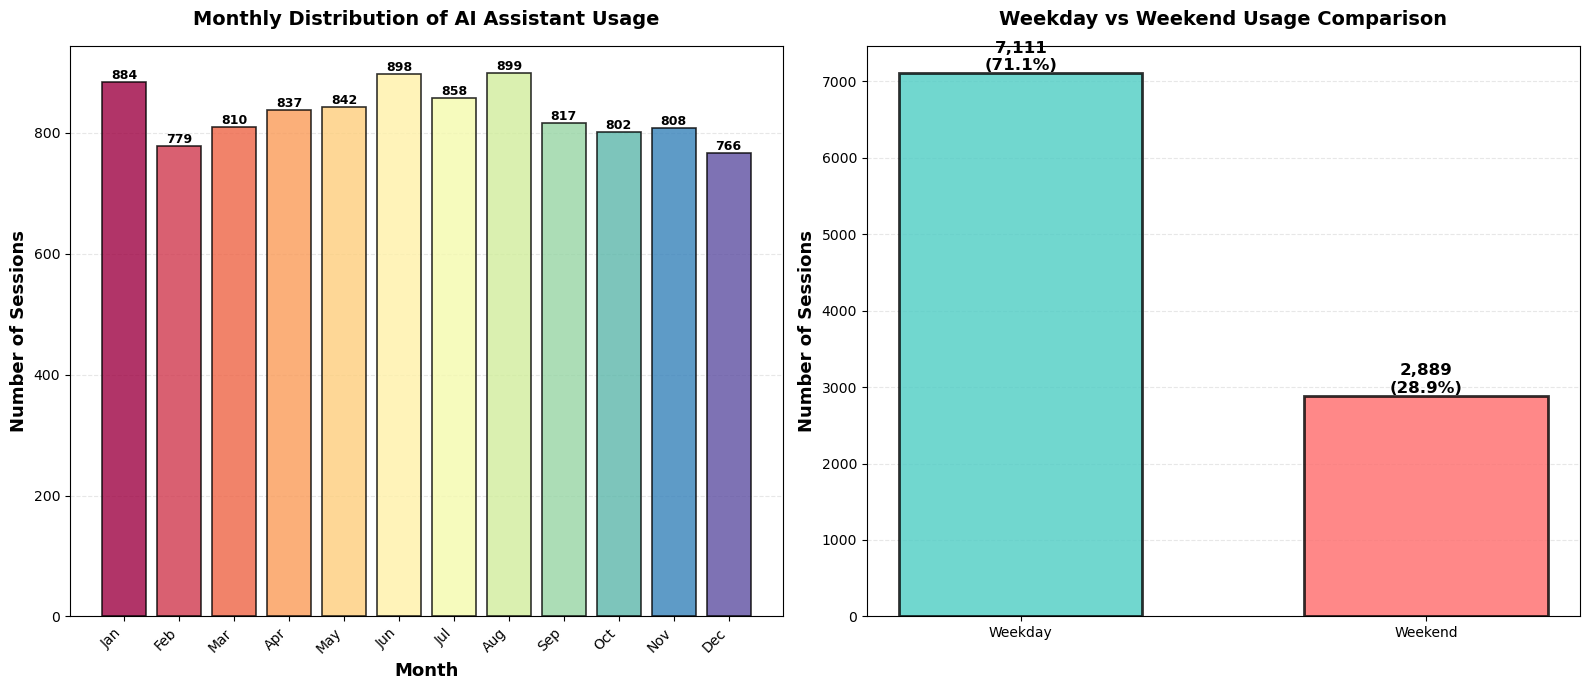

In [ ]:
# ============================================================
# Visualization 2: Monthly Distribution (Bar Chart with Trend)
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Monthly distribution
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = df['MonthName'].value_counts().reindex(month_order)

colors = plt.cm.Spectral(np.linspace(0, 1, 12))
bars = ax1.bar(range(12), monthly_counts.values, color=colors, 
               edgecolor='black', linewidth=1.2, alpha=0.8)

for i, (bar, value) in enumerate(zip(bars, monthly_counts.values)):
    ax1.text(bar.get_x() + bar.get_width()/2., value,
             f'{value:,}', ha='center', va='bottom', fontsize=9, weight='bold')

ax1.set_xlabel('Month', fontsize=13, weight='bold')
ax1.set_ylabel('Number of Sessions', fontsize=13, weight='bold')
ax1.set_title('Monthly Distribution of AI Assistant Usage', fontsize=14, weight='bold', pad=15)
ax1.set_xticks(range(12))
ax1.set_xticklabels([m[:3] for m in month_order], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Right: Weekday vs Weekend comparison
weekend_data = df['IsWeekend'].value_counts()
colors_we = ['#4ECDC4', '#FF6B6B']
bars = ax2.bar(weekend_data.index, weekend_data.values, color=colors_we,
               edgecolor='black', linewidth=2, alpha=0.8, width=0.6)

for bar, value in zip(bars, weekend_data.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:,}\n({value/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12, weight='bold')

ax2.set_ylabel('Number of Sessions', fontsize=13, weight='bold')
ax2.set_title('Weekday vs Weekend Usage Comparison', fontsize=14, weight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

plt.tight_layout()
plt.savefig('time_pattern_3_monthly_weekend.png', dpi=300, bbox_inches='tight')
plt.show()

The figure reveals distinct monthly usage patterns: students engage most frequently with AI assistants in January, June through August, while February and December show notably lower usage. Moderate engagement levels are observed during remaining months. This pattern likely reflects academic cycles—peak usage coincides with examination periods (January, June) and pre-semester preparation (August), whereas usage declines during extended holiday breaks (February).

# SatisfactionRating

This chapter investigates the determinants of student satisfaction with AI assistants.

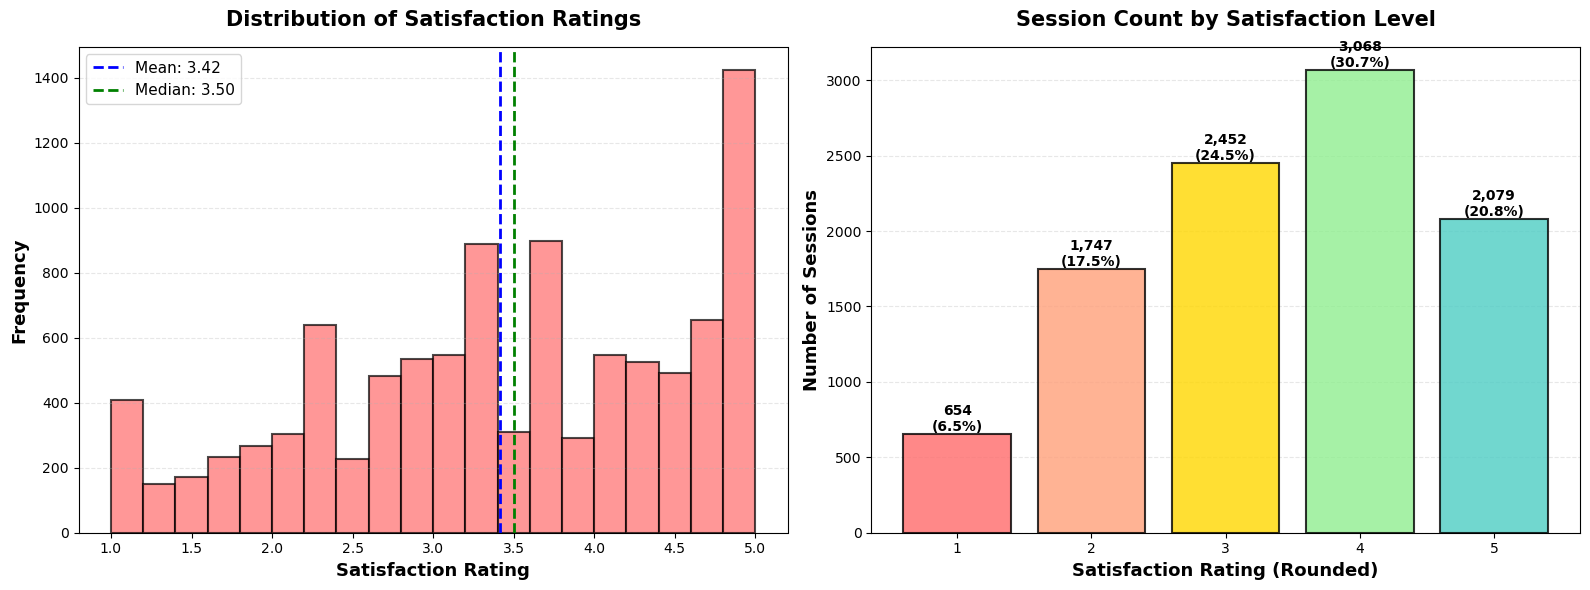

In [16]:
# ============================================================
# Figure 1: Overall Satisfaction Distribution
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Histogram
ax1.hist(df['SatisfactionRating'], bins=20, color='#FF6B6B', 
         edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.axvline(df['SatisfactionRating'].mean(), color='blue', linestyle='--', 
            linewidth=2, label=f'Mean: {df["SatisfactionRating"].mean():.2f}')
ax1.axvline(df['SatisfactionRating'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Median: {df["SatisfactionRating"].median():.2f}')

ax1.set_xlabel('Satisfaction Rating', fontsize=13, weight='bold')
ax1.set_ylabel('Frequency', fontsize=13, weight='bold')
ax1.set_title('Distribution of Satisfaction Ratings', fontsize=15, weight='bold', pad=15)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Right: Count by rating level
rating_counts = df['SatisfactionRating'].round().value_counts().sort_index()
colors = ['#FF6B6B', '#FFA07A', '#FFD700', '#90EE90', '#4ECDC4']
bars = ax2.bar(rating_counts.index, rating_counts.values, 
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

for bar, value in zip(bars, rating_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:,}\n({value/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10, weight='bold')

ax2.set_xlabel('Satisfaction Rating (Rounded)', fontsize=13, weight='bold')
ax2.set_ylabel('Number of Sessions', fontsize=13, weight='bold')
ax2.set_title('Session Count by Satisfaction Level', fontsize=15, weight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

plt.tight_layout()
plt.show()

The figure illustrates the distribution of satisfaction ratings, with a mean of 3.42 and median of 3.50 indicating an overall upper-moderate satisfaction level. Sessions rated 4 points constitute the largest proportion (30.7%) of all satisfaction scores.

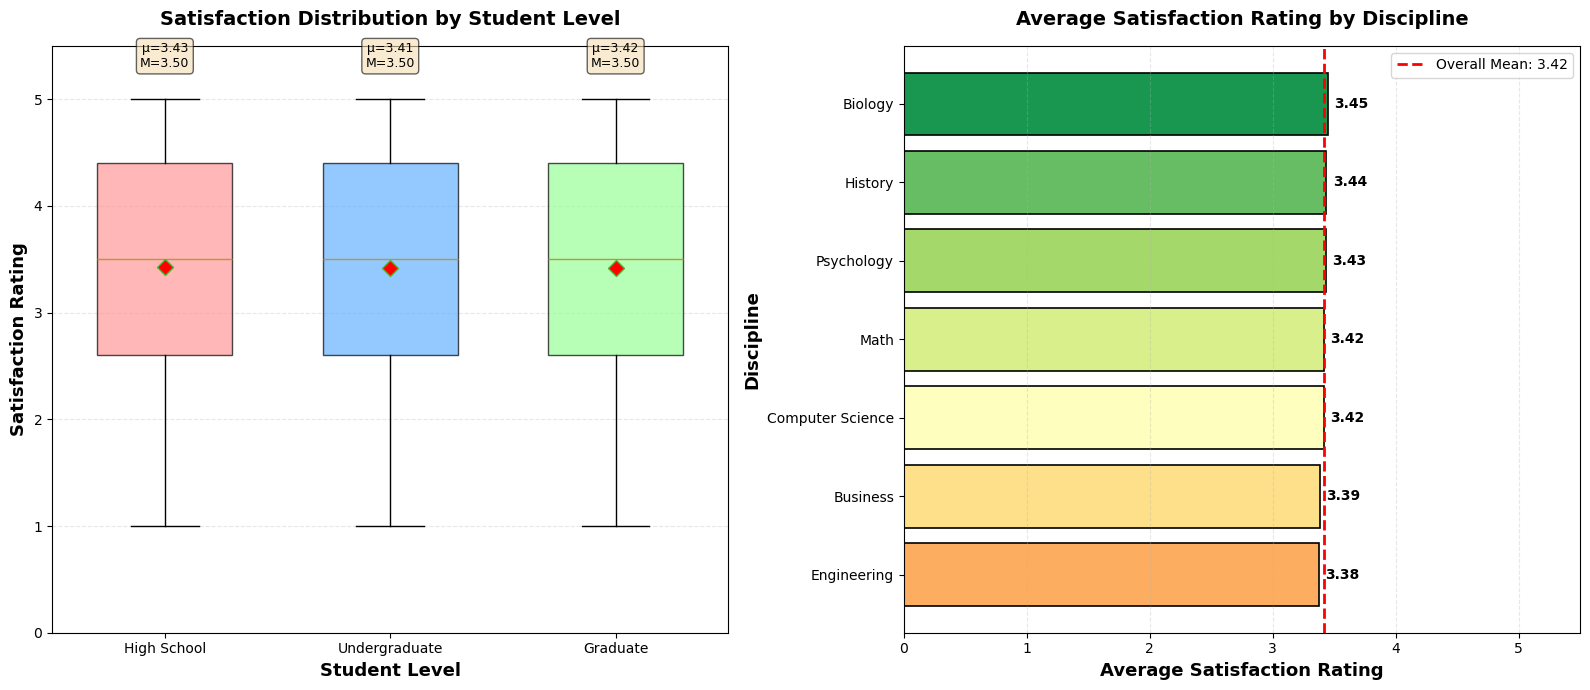

In [ ]:
# ============================================================
# Figure 2: Satisfaction by Student Level & Discipline
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Box plot by Student Level
student_order = ['High School', 'Undergraduate', 'Graduate']
student_data = [df[df['StudentLevel'] == level]['SatisfactionRating'].values for level in student_order]

bp1 = ax1.boxplot(student_data, labels=student_order, patch_artist=True,
                  widths=0.6, showmeans=True, 
                  meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

colors_box = ['#FF9999', '#66B2FF', '#99FF99']
for patch, color in zip(bp1['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add statistics
for i, level in enumerate(student_order, 1):
    data = df[df['StudentLevel'] == level]['SatisfactionRating']
    mean_val = data.mean()
    median_val = data.median()
    ax1.text(i, 5.3, f'μ={mean_val:.2f}\nM={median_val:.2f}',
             ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))

ax1.set_xlabel('Student Level', fontsize=13, weight='bold')
ax1.set_ylabel('Satisfaction Rating', fontsize=13, weight='bold')
ax1.set_title('Satisfaction Distribution by Student Level', fontsize=14, weight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, 5.5)

# Right: Average satisfaction by Discipline
disc_satisfaction = df.groupby('Discipline')['SatisfactionRating'].mean().sort_values(ascending=True)
colors_disc = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(disc_satisfaction)))

bars = ax2.barh(disc_satisfaction.index, disc_satisfaction.values, 
                color=colors_disc, edgecolor='black', linewidth=1.2)

for bar, value in zip(bars, disc_satisfaction.values):
    ax2.text(value + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{value:.2f}', va='center', fontsize=10, weight='bold')

ax2.axvline(df['SatisfactionRating'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Overall Mean: {df["SatisfactionRating"].mean():.2f}')
ax2.set_xlabel('Average Satisfaction Rating', fontsize=13, weight='bold')
ax2.set_ylabel('Discipline', fontsize=13, weight='bold')
ax2.set_title('Average Satisfaction Rating by Discipline', fontsize=14, weight='bold', pad=15)
ax2.legend(fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_xlim(0, 5.5)

plt.tight_layout()
plt.show()

The figure indicates comparable overall session satisfaction ratings across students of different proficiency levels and academic disciplines, with no statistically significant variations observed among these groups.

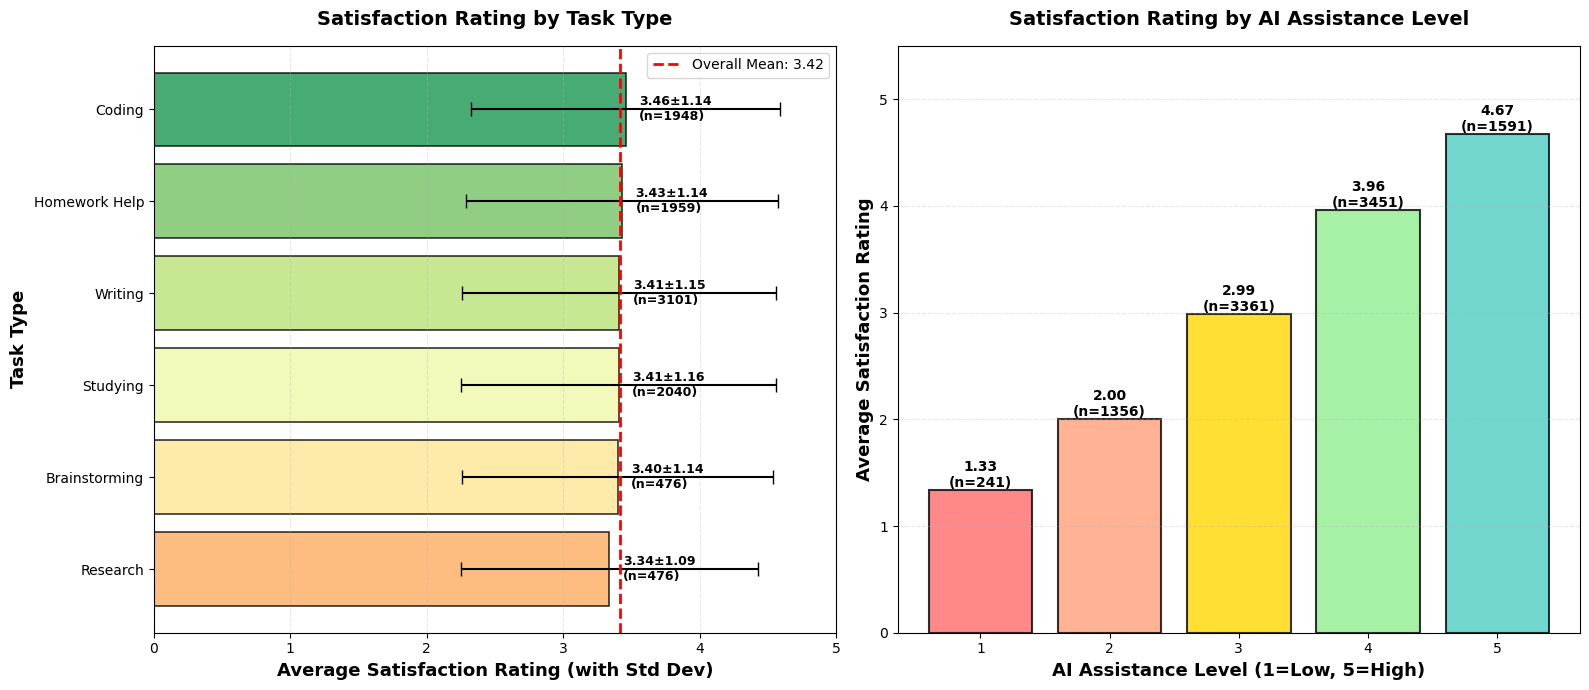

In [ ]:
# ============================================================
# Figure 3: Satisfaction by Task Type & AI Assistance
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Satisfaction by Task Type
task_satisfaction = df.groupby('TaskType')['SatisfactionRating'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=True)

colors_task = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(task_satisfaction)))
bars = ax1.barh(task_satisfaction.index, task_satisfaction['mean'], 
                xerr=task_satisfaction['std'], color=colors_task, 
                edgecolor='black', linewidth=1.2, alpha=0.8, capsize=5)

for i, (bar, row) in enumerate(zip(bars, task_satisfaction.itertuples())):
    ax1.text(row.mean + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{row.mean:.2f}±{row.std:.2f}\n(n={row.count})',
             va='center', fontsize=9, weight='bold')

ax1.axvline(df['SatisfactionRating'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Overall Mean: {df["SatisfactionRating"].mean():.2f}')
ax1.set_xlabel('Average Satisfaction Rating (with Std Dev)', fontsize=13, weight='bold')
ax1.set_ylabel('Task Type', fontsize=13, weight='bold')
ax1.set_title('Satisfaction Rating by Task Type', fontsize=14, weight='bold', pad=15)
ax1.legend(fontsize=10)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim(0, 5)

# Right: Satisfaction by AI Assistance Level
ai_satisfaction = df.groupby('AI_AssistanceLevel')['SatisfactionRating'].agg(['mean', 'count'])

colors_ai = ['#FF6B6B', '#FFA07A', '#FFD700', '#90EE90', '#4ECDC4']
bars = ax2.bar(ai_satisfaction.index, ai_satisfaction['mean'], 
               color=colors_ai, edgecolor='black', linewidth=1.5, alpha=0.8)

for bar, idx in zip(bars, ai_satisfaction.index):
    height = bar.get_height()
    count = ai_satisfaction.loc[idx, 'count']
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}\n(n={count})',
             ha='center', va='bottom', fontsize=10, weight='bold')

ax2.set_xlabel('AI Assistance Level (1=Low, 5=High)', fontsize=13, weight='bold')
ax2.set_ylabel('Average Satisfaction Rating', fontsize=13, weight='bold')
ax2.set_title('Satisfaction Rating by AI Assistance Level', fontsize=14, weight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, 5.5)

plt.tight_layout()
plt.show()

This figure analyzes how task types and AI assistance levels influence student satisfaction with AI assistants. Among task categories, coding-related tasks achieve the highest satisfaction score (3.46), while research-oriented tasks receive the lowest (3.34). A positive correlation is observed between assistance levels and satisfaction ratings, with level-5 assistance yielding the maximum satisfaction score of 4.67.

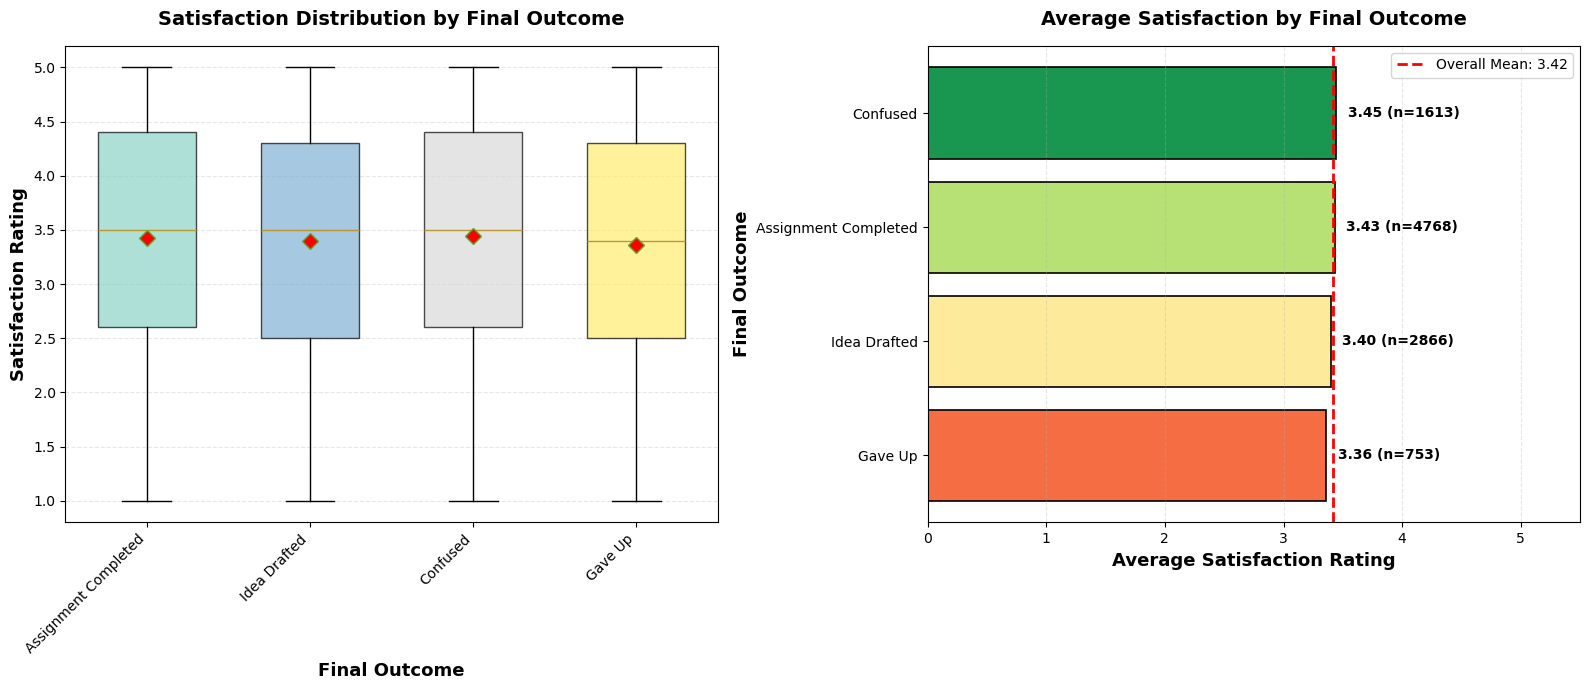

In [ ]:
# ============================================================
# Figure 5: Satisfaction by Final Outcome
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Box plot by Final Outcome
outcome_order = df['FinalOutcome'].value_counts().index.tolist()
outcome_data = [df[df['FinalOutcome'] == outcome]['SatisfactionRating'].values for outcome in outcome_order]

bp = ax1.boxplot(outcome_data, labels=outcome_order, patch_artist=True,
                 widths=0.6, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

colors_outcome = plt.cm.Set3(np.linspace(0, 1, len(outcome_order)))
for patch, color in zip(bp['boxes'], colors_outcome):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_xlabel('Final Outcome', fontsize=13, weight='bold')
ax1.set_ylabel('Satisfaction Rating', fontsize=13, weight='bold')
ax1.set_title('Satisfaction Distribution by Final Outcome', fontsize=14, weight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Right: Average satisfaction by outcome
outcome_satisfaction = df.groupby('FinalOutcome')['SatisfactionRating'].agg(['mean', 'count']).sort_values('mean', ascending=True)

colors_out = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(outcome_satisfaction)))
bars = ax2.barh(outcome_satisfaction.index, outcome_satisfaction['mean'], 
                color=colors_out, edgecolor='black', linewidth=1.2)

for bar, idx in zip(bars, outcome_satisfaction.index):
    mean_val = outcome_satisfaction.loc[idx, 'mean']
    count_val = outcome_satisfaction.loc[idx, 'count']
    ax2.text(mean_val + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{mean_val:.2f} (n={count_val})',
             va='center', fontsize=10, weight='bold')

ax2.axvline(df['SatisfactionRating'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Overall Mean: {df["SatisfactionRating"].mean():.2f}')
ax2.set_xlabel('Average Satisfaction Rating', fontsize=13, weight='bold')
ax2.set_ylabel('Final Outcome', fontsize=13, weight='bold')
ax2.set_title('Average Satisfaction by Final Outcome', fontsize=14, weight='bold', pad=15)
ax2.legend(fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_xlim(0, 5.5)

plt.tight_layout()
plt.show()

The data reveals that dialogue outcomes exert limited influence on overall session satisfaction ratings. Although sessions ending in task abandonment—representing negative outcomes—show the lowest average satisfaction score (3.36), the disparity compared to other outcome categories remains statistically insignificant.

# TaskType

This chapter examines the specific task scenarios in which AI assistants demonstrate optimal performance.

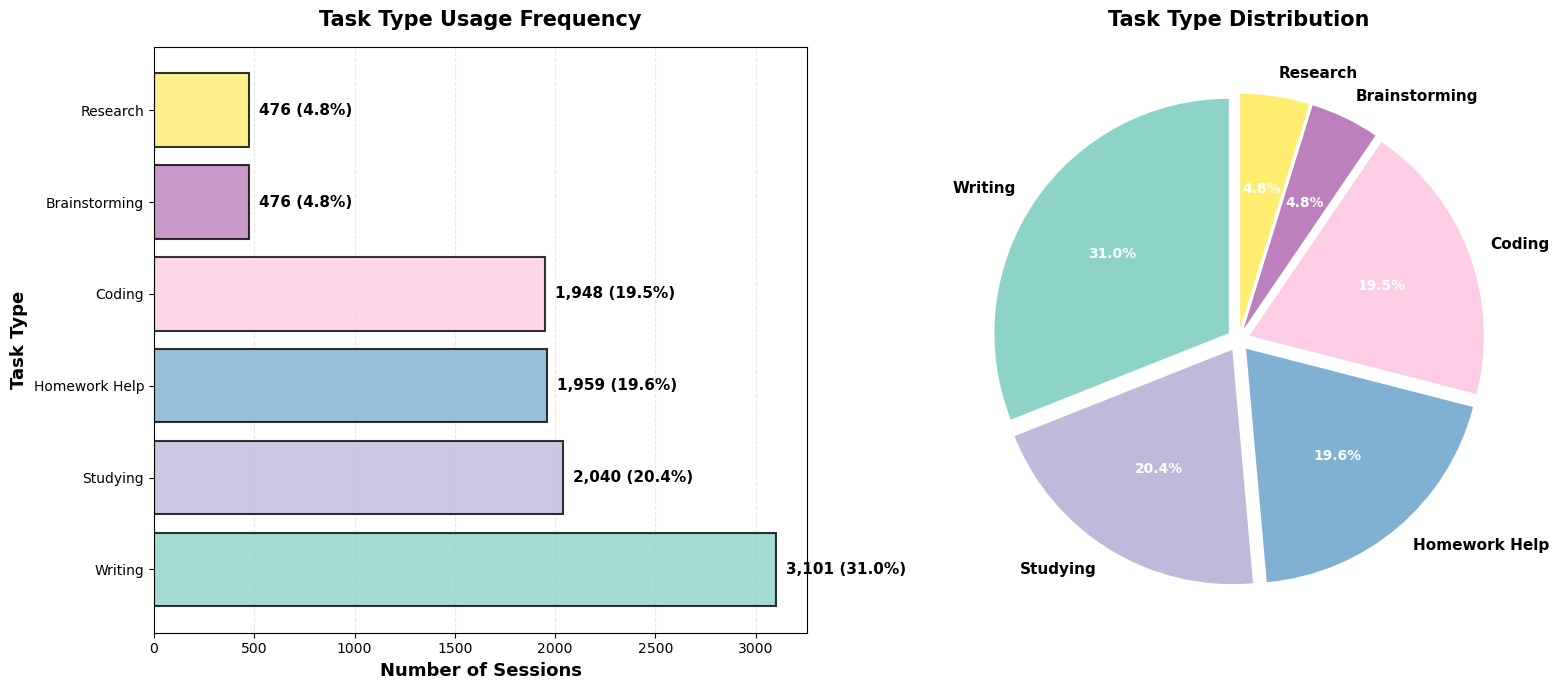

In [21]:
# ============================================================
# Figure 1: Overall Task Type Distribution & Popularity
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Task frequency
task_counts = df['TaskType'].value_counts()
colors_task = plt.cm.Set3(np.linspace(0, 1, len(task_counts)))

bars = ax1.barh(task_counts.index, task_counts.values, 
                color=colors_task, edgecolor='black', linewidth=1.5, alpha=0.8)

for bar, value in zip(bars, task_counts.values):
    ax1.text(value + 50, bar.get_y() + bar.get_height()/2, 
             f'{value:,} ({value/len(df)*100:.1f}%)',
             va='center', fontsize=11, weight='bold')

ax1.set_xlabel('Number of Sessions', fontsize=13, weight='bold')
ax1.set_ylabel('Task Type', fontsize=13, weight='bold')
ax1.set_title('Task Type Usage Frequency', fontsize=15, weight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Right: Pie chart
explode = [0.05] * len(task_counts)
wedges, texts, autotexts = ax2.pie(task_counts.values, labels=task_counts.index,
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors_task, explode=explode,
                                     textprops={'fontsize': 11, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

ax2.set_title('Task Type Distribution', fontsize=15, weight='bold', pad=15)

plt.tight_layout()
plt.show()

The figure reveals that writing tasks constitute the largest proportion at 31%, while Studying, Homework Help, and Coding tasks show comparable frequencies of approximately 20% each. In contrast, Research and Brainstorming tasks represent the smallest proportions at merely 4.8%.

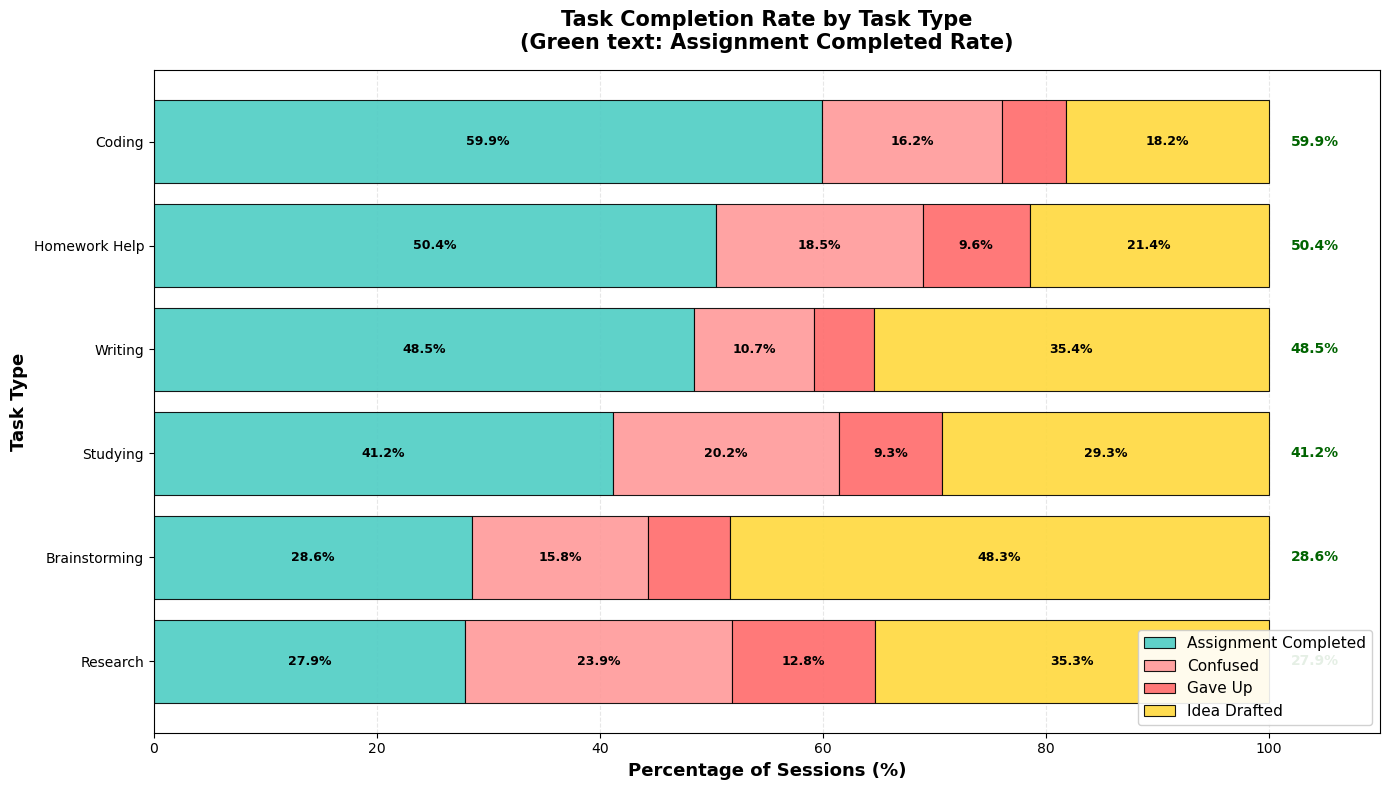

In [ ]:
# ============================================================
# Figure 2: Task Completion Rate by Task Type
# ============================================================

fig, ax = plt.subplots(figsize=(14, 8))

# Calculate completion rate for each task type
task_outcomes = df.groupby(['TaskType', 'FinalOutcome']).size().unstack(fill_value=0)

# Calculate success rate (Assignment Completed)
if 'Assignment Completed' in task_outcomes.columns:
    task_outcomes['SuccessRate'] = (task_outcomes['Assignment Completed'] / task_outcomes.sum(axis=1) * 100)
else:
    task_outcomes['SuccessRate'] = 0

# Sort by success rate
task_outcomes_sorted = task_outcomes.sort_values('SuccessRate', ascending=True)

# Create stacked bar chart
outcome_cols = [col for col in task_outcomes_sorted.columns if col != 'SuccessRate']
colors_outcome = {'Assignment Completed': '#4ECDC4', 
                  'Idea Drafted': '#FFD93D', 
                  'Confused': '#FF9999',
                  'Gave Up': '#FF6B6B'}

bottom = np.zeros(len(task_outcomes_sorted))
for outcome in outcome_cols:
    if outcome in task_outcomes_sorted.columns:
        values = task_outcomes_sorted[outcome].values
        percentages = (values / task_outcomes_sorted[outcome_cols].sum(axis=1).values) * 100
        color = colors_outcome.get(outcome, '#CCCCCC')
        bars = ax.barh(range(len(task_outcomes_sorted)), percentages, 
                       left=bottom, label=outcome, color=color, 
                       edgecolor='black', linewidth=0.8, alpha=0.9)
        
        # Add percentage labels for significant segments
        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            if pct > 8:  # Only show labels for segments > 8%
                ax.text(bottom[i] + pct/2, i, f'{pct:.1f}%',
                       ha='center', va='center', fontsize=9, weight='bold', color='black')
        
        bottom += percentages

# Add success rate text
for i, (task, rate) in enumerate(zip(task_outcomes_sorted.index, task_outcomes_sorted['SuccessRate'])):
    ax.text(102, i, f'{rate:.1f}%', va='center', fontsize=10, weight='bold', color='darkgreen')

ax.set_yticks(range(len(task_outcomes_sorted)))
ax.set_yticklabels(task_outcomes_sorted.index)
ax.set_xlabel('Percentage of Sessions (%)', fontsize=13, weight='bold')
ax.set_ylabel('Task Type', fontsize=13, weight='bold')
ax.set_title('Task Completion Rate by Task Type\n(Green text: Assignment Completed Rate)', 
             fontsize=15, weight='bold', pad=15)
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.set_xlim(0, 110)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

The data illustrates that AI demonstrates optimal performance in coding tasks, successfully completing approximately 60% of such assignments. In contrast, its effectiveness significantly diminishes in brainstorming and research tasks, with completion rates of merely 28%. Research tasks exhibit the highest confusion rate at 23.9%, indicating their inherent complexity often leads to user uncertainty. Conversely, writing tasks show the lowest confusion rate (10.7%), likely attributable to their relatively well-defined objectives. Notably, brainstorming sessions display the highest proportion of draft conceptualization (48.3%), with nearly half of conversations remaining at the preliminary ideation stage. This pattern reflects the open-ended nature of brainstorming activities, where users predominantly engage in creative exploration rather than seeking definitive solutions.

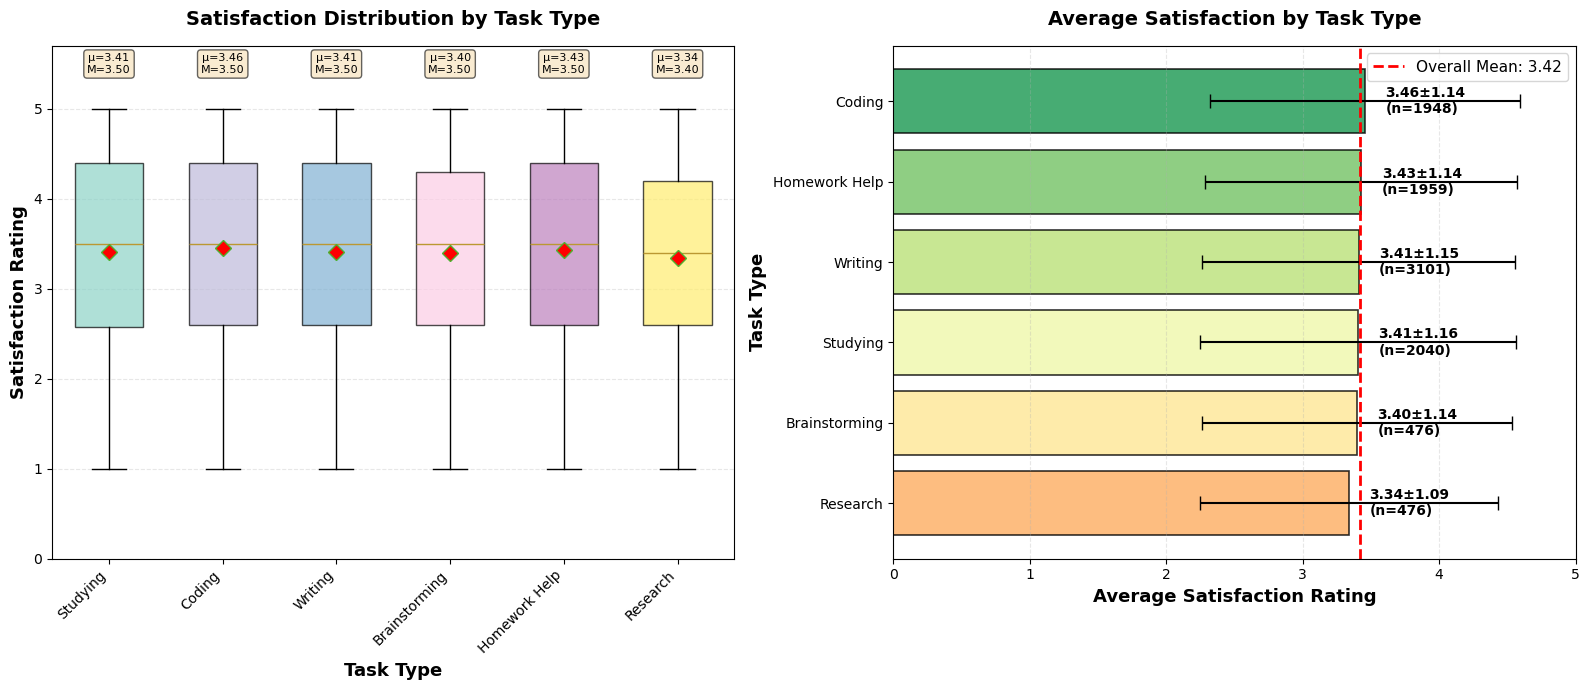

In [23]:
# ============================================================
# Figure 3: Satisfaction Rating by Task Type
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Box plot
task_types = df['TaskType'].unique()
task_data = [df[df['TaskType'] == task]['SatisfactionRating'].values for task in task_types]

bp = ax1.boxplot(task_data, labels=task_types, patch_artist=True,
                 widths=0.6, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

colors_box = plt.cm.Set3(np.linspace(0, 1, len(task_types)))
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add statistics
for i, task in enumerate(task_types, 1):
    data = df[df['TaskType'] == task]['SatisfactionRating']
    mean_val = data.mean()
    median_val = data.median()
    ax1.text(i, 5.4, f'μ={mean_val:.2f}\nM={median_val:.2f}',
             ha='center', fontsize=8, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))

ax1.set_xlabel('Task Type', fontsize=13, weight='bold')
ax1.set_ylabel('Satisfaction Rating', fontsize=13, weight='bold')
ax1.set_title('Satisfaction Distribution by Task Type', fontsize=14, weight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, 5.7)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Right: Average satisfaction
task_satisfaction = df.groupby('TaskType')['SatisfactionRating'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=True)

colors_sat = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(task_satisfaction)))
bars = ax2.barh(task_satisfaction.index, task_satisfaction['mean'],
                xerr=task_satisfaction['std'], color=colors_sat,
                edgecolor='black', linewidth=1.2, alpha=0.8, capsize=5)

for bar, row in zip(bars, task_satisfaction.itertuples()):
    ax2.text(row.mean + 0.15, bar.get_y() + bar.get_height()/2,
             f'{row.mean:.2f}±{row.std:.2f}\n(n={row.count})',
             va='center', fontsize=10, weight='bold')

ax2.axvline(df['SatisfactionRating'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Overall Mean: {df["SatisfactionRating"].mean():.2f}')
ax2.set_xlabel('Average Satisfaction Rating', fontsize=13, weight='bold')
ax2.set_ylabel('Task Type', fontsize=13, weight='bold')
ax2.set_title('Average Satisfaction by Task Type', fontsize=14, weight='bold', pad=15)
ax2.legend(fontsize=11)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_xlim(0, 5)

plt.tight_layout()
plt.savefig('task_3_satisfaction.png', dpi=300, bbox_inches='tight')
plt.show()

The figure indicates minimal variation in overall session satisfaction ratings and perceived AI helpfulness evaluations across different task types. While coding tasks—where AI demonstrates stronger performance—show marginally higher metrics, and brainstorming/research tasks with poorer AI performance exhibit slightly lower scores, no statistically significant disparities are observed among these categories.

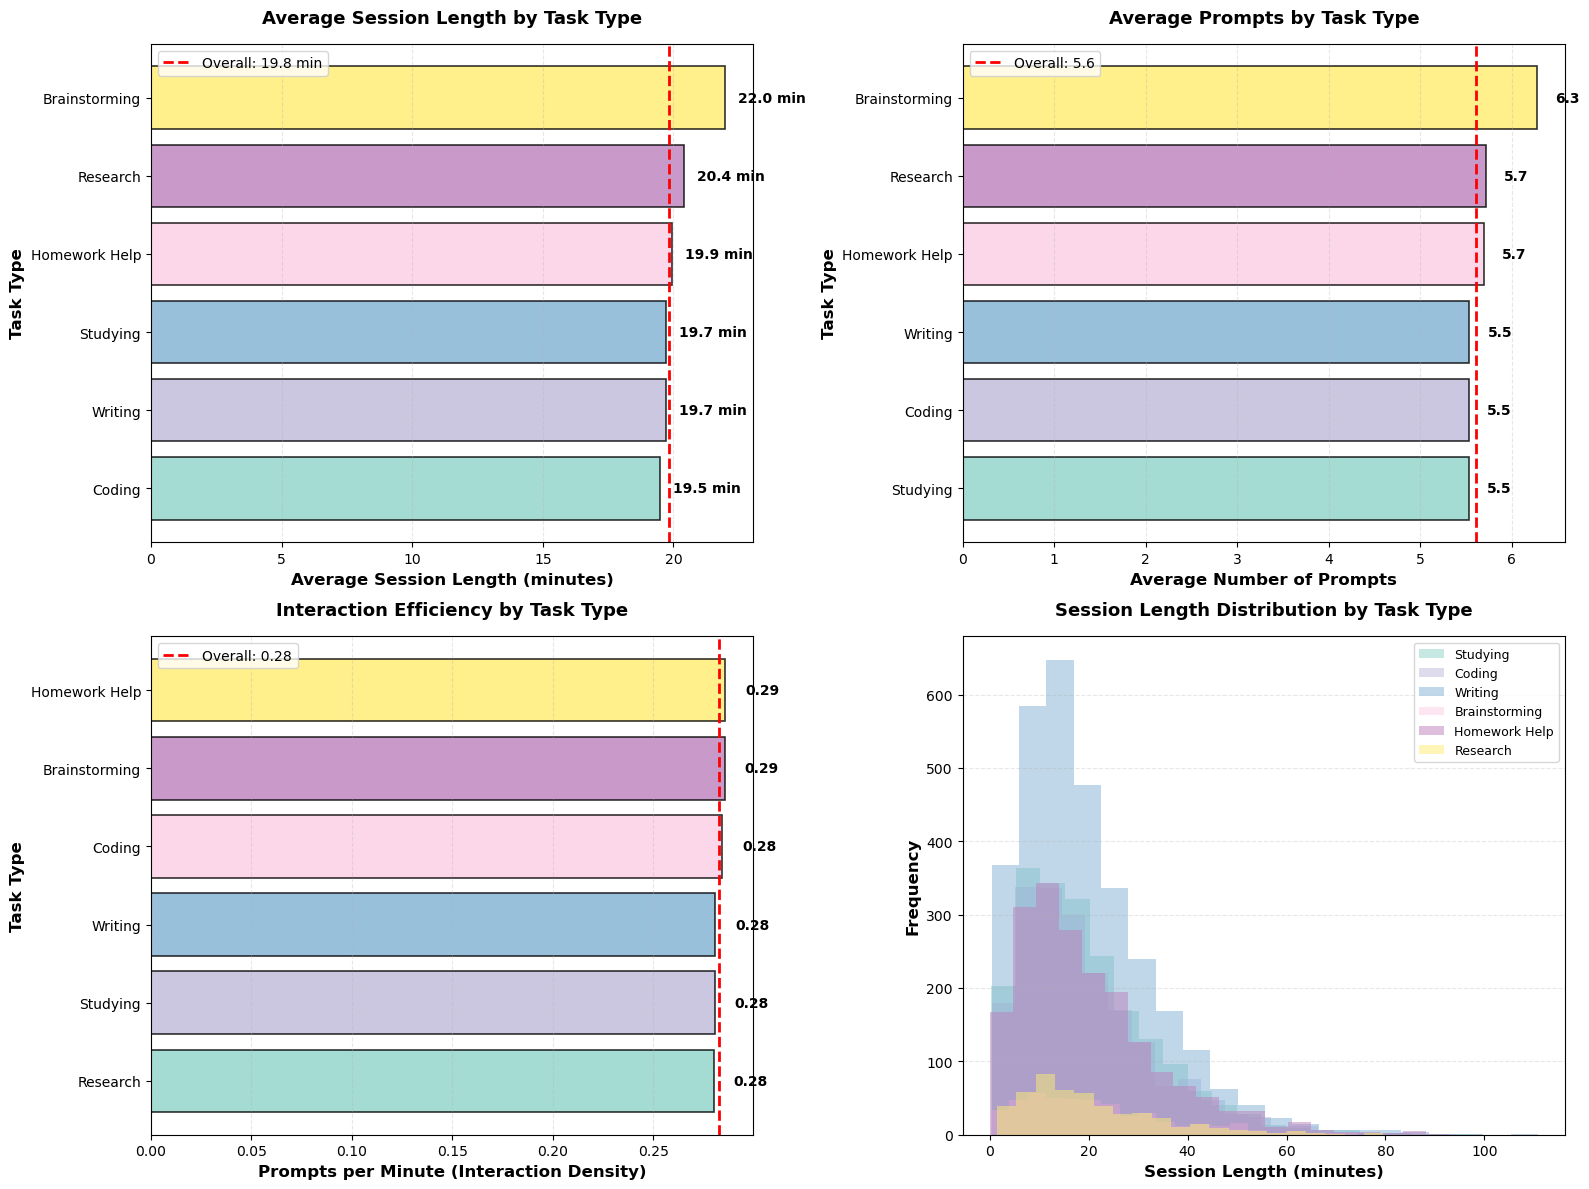

In [ ]:
# ============================================================
# Figure 4: Task Efficiency - Session Length & Prompts
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Session length by task
ax = axes[0, 0]
task_length = df.groupby('TaskType')['SessionLengthMin'].mean().sort_values(ascending=True)
bars = ax.barh(task_length.index, task_length.values,
               color=colors_task[:len(task_length)], edgecolor='black', linewidth=1.2, alpha=0.8)

for bar, value in zip(bars, task_length.values):
    ax.text(value + 0.5, bar.get_y() + bar.get_height()/2,
            f'{value:.1f} min', va='center', fontsize=10, weight='bold')

ax.axvline(df['SessionLengthMin'].mean(), color='red', linestyle='--',
           linewidth=2, label=f'Overall: {df["SessionLengthMin"].mean():.1f} min')
ax.set_xlabel('Average Session Length (minutes)', fontsize=12, weight='bold')
ax.set_ylabel('Task Type', fontsize=12, weight='bold')
ax.set_title('Average Session Length by Task Type', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Top-right: Total prompts by task
ax = axes[0, 1]
task_prompts = df.groupby('TaskType')['TotalPrompts'].mean().sort_values(ascending=True)
bars = ax.barh(task_prompts.index, task_prompts.values,
               color=colors_task[:len(task_prompts)], edgecolor='black', linewidth=1.2, alpha=0.8)

for bar, value in zip(bars, task_prompts.values):
    ax.text(value + 0.2, bar.get_y() + bar.get_height()/2,
            f'{value:.1f}', va='center', fontsize=10, weight='bold')

ax.axvline(df['TotalPrompts'].mean(), color='red', linestyle='--',
           linewidth=2, label=f'Overall: {df["TotalPrompts"].mean():.1f}')
ax.set_xlabel('Average Number of Prompts', fontsize=12, weight='bold')
ax.set_ylabel('Task Type', fontsize=12, weight='bold')
ax.set_title('Average Prompts by Task Type', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Bottom-left: Prompts per minute (efficiency)
ax = axes[1, 0]
task_stats = df.groupby('TaskType').agg({
    'TotalPrompts': 'mean',
    'SessionLengthMin': 'mean'
})
task_stats['PromptsPerMin'] = (task_stats['TotalPrompts'] / task_stats['SessionLengthMin']).sort_values(ascending=True)
task_efficiency = task_stats['PromptsPerMin'].sort_values(ascending=True)

bars = ax.barh(task_efficiency.index, task_efficiency.values,
               color=colors_task[:len(task_efficiency)], edgecolor='black', linewidth=1.2, alpha=0.8)

for bar, value in zip(bars, task_efficiency.values):
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2,
            f'{value:.2f}', va='center', fontsize=10, weight='bold')

overall_efficiency = df['TotalPrompts'].sum() / df['SessionLengthMin'].sum()
ax.axvline(overall_efficiency, color='red', linestyle='--',
           linewidth=2, label=f'Overall: {overall_efficiency:.2f}')
ax.set_xlabel('Prompts per Minute (Interaction Density)', fontsize=12, weight='bold')
ax.set_ylabel('Task Type', fontsize=12, weight='bold')
ax.set_title('Interaction Efficiency by Task Type', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Bottom-right: Session length distribution
ax = axes[1, 1]
for i, task in enumerate(df['TaskType'].unique()):
    task_data = df[df['TaskType'] == task]['SessionLengthMin']
    ax.hist(task_data, bins=20, alpha=0.5, label=task, color=colors_task[i])

ax.set_xlabel('Session Length (minutes)', fontsize=12, weight='bold')
ax.set_ylabel('Frequency', fontsize=12, weight='bold')
ax.set_title('Session Length Distribution by Task Type', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=9, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

The figure reveals the following observations: 
- Top-left panel displays average session duration across task types. Brainstorming sessions require the longest duration (22.0 minutes), followed by Research tasks (20.4 minutes), while Coding exhibits the shortest duration (19.5 minutes). Open-ended exploratory tasks (e.g., brainstorming, research) necessitate extended interactions for conceptual development and information synthesis, whereas structured tasks with well-defined procedures (e.g., coding) demonstrate higher efficiency through clearer operational pathways. 
- Top-right panel illustrates average prompt counts. Brainstorming demands the highest number of prompts (6.3), with Research and Homework Help following closely (5.7). Writing, Coding, and Studying tasks require the fewest prompts (5.5). Open-ended tasks typically involve more iterative prompt exchanges to facilitate creative divergence and directional exploration, while structured tasks maintain concise interaction patterns due to their predefined objectives and streamlined workflows.

# UsedAgain

This chapter explores the determinants influencing students' continued usage intention of AI assistants.

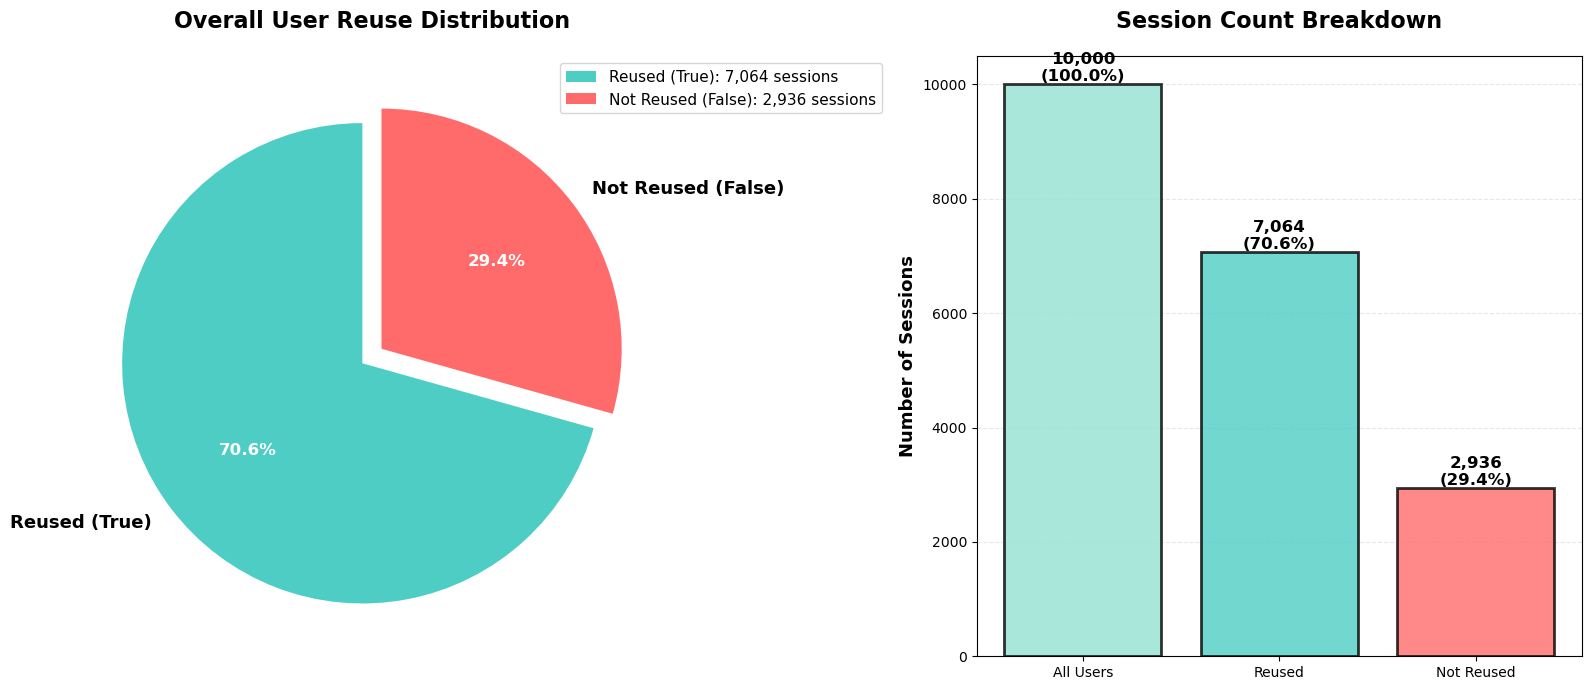

In [25]:
# ============================================================
# Figure 1: Overall Reuse Distribution
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Pie chart
reuse_counts = df['UsedAgain'].value_counts()
colors = ['#4ECDC4', '#FF6B6B']
labels = ['Reused (True)', 'Not Reused (False)']
explode = (0.05, 0.05)

wedges, texts, autotexts = ax1.pie(reuse_counts.values, labels=labels,
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors, explode=explode,
                                     textprops={'fontsize': 13, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

ax1.set_title('Overall User Reuse Distribution', fontsize=16, weight='bold', pad=20)

# Add count labels
legend_labels = [f'{label}: {count:,} sessions' for label, count in zip(labels, reuse_counts.values)]
ax1.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.8, 1), fontsize=11)

# Right: Bar chart with segments
categories = ['All Users', 'Reused', 'Not Reused']
values = [len(df), df['UsedAgain'].sum(), (~df['UsedAgain']).sum()]
colors_bar = ['#95E1D3', '#4ECDC4', '#FF6B6B']

bars = ax2.bar(categories, values, color=colors_bar, 
               edgecolor='black', linewidth=2, alpha=0.8)

for bar, value in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:,}\n({value/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12, weight='bold')

ax2.set_ylabel('Number of Sessions', fontsize=13, weight='bold')
ax2.set_title('Session Count Breakdown', fontsize=16, weight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

plt.tight_layout()
plt.show()

The figure indicates that approximately 70% of users continued utilizing the AI after conversations, while only 30% discontinued its use.

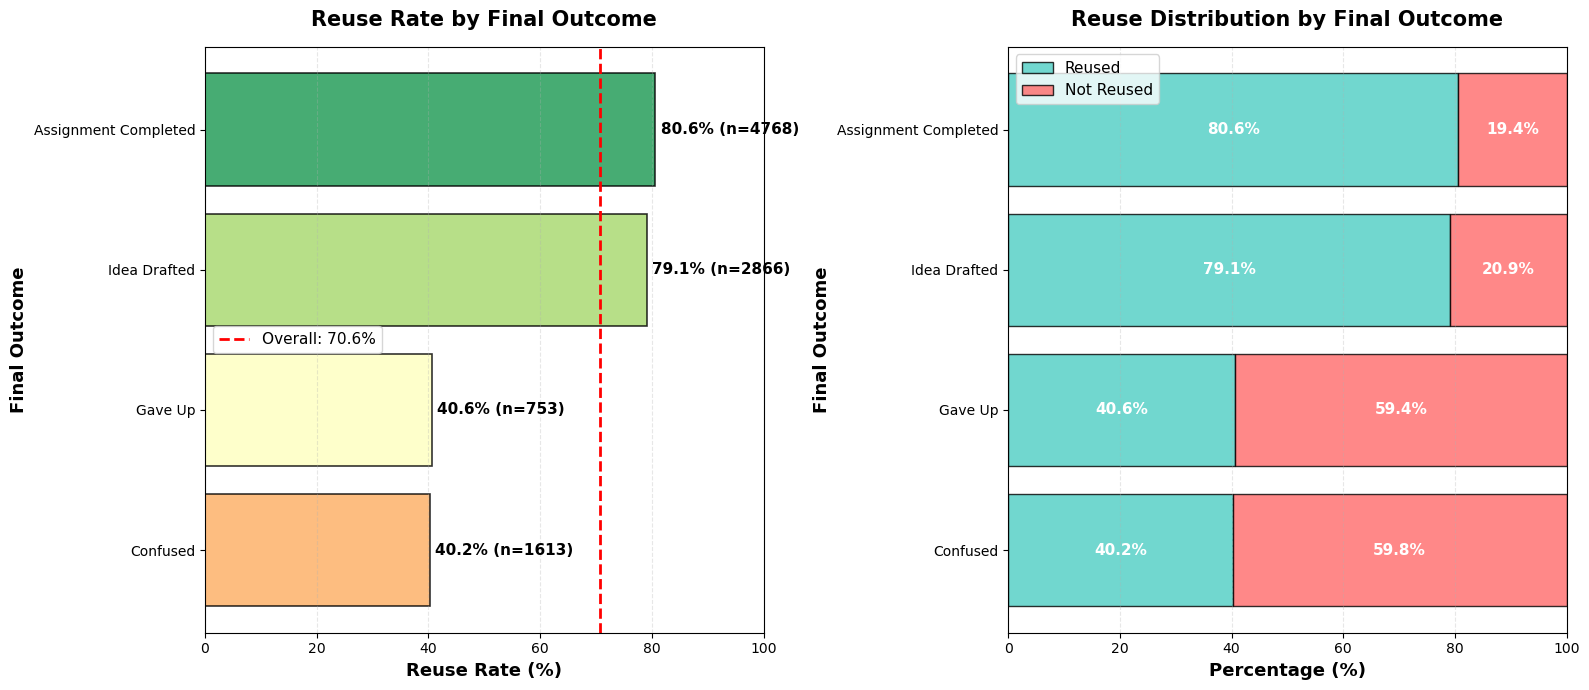

In [26]:
# ============================================================
# Figure 2: Reuse Rate by Final Outcome
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Reuse rate by final outcome
reuse_by_outcome = df.groupby('FinalOutcome')['UsedAgain'].agg(['sum', 'count'])
reuse_by_outcome['rate'] = (reuse_by_outcome['sum'] / reuse_by_outcome['count'] * 100).round(1)
reuse_by_outcome = reuse_by_outcome.sort_values('rate', ascending=True)

colors_outcome = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(reuse_by_outcome)))
bars = ax1.barh(reuse_by_outcome.index, reuse_by_outcome['rate'],
                color=colors_outcome, edgecolor='black', linewidth=1.2, alpha=0.8)

for bar, idx in zip(bars, reuse_by_outcome.index):
    width = bar.get_width()
    count = reuse_by_outcome.loc[idx, 'count']
    rate = reuse_by_outcome.loc[idx, 'rate']
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{rate:.1f}% (n={count})',
             va='center', fontsize=11, weight='bold')

ax1.axvline(df['UsedAgain'].mean() * 100, color='red', linestyle='--',
            linewidth=2, label=f'Overall: {df["UsedAgain"].mean()*100:.1f}%')
ax1.set_xlabel('Reuse Rate (%)', fontsize=13, weight='bold')
ax1.set_ylabel('Final Outcome', fontsize=13, weight='bold')
ax1.set_title('Reuse Rate by Final Outcome', fontsize=15, weight='bold', pad=15)
ax1.legend(fontsize=11)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim(0, 100)

# Right: Stacked percentage bar
outcome_reuse = df.groupby(['FinalOutcome', 'UsedAgain']).size().unstack(fill_value=0)
outcome_reuse_pct = outcome_reuse.div(outcome_reuse.sum(axis=1), axis=0) * 100
outcome_reuse_pct = outcome_reuse_pct.sort_values(True, ascending=True)

bars1 = ax2.barh(range(len(outcome_reuse_pct)), outcome_reuse_pct[True],
                 label='Reused', color='#4ECDC4', edgecolor='black', linewidth=1, alpha=0.8)
bars2 = ax2.barh(range(len(outcome_reuse_pct)), outcome_reuse_pct[False],
                 left=outcome_reuse_pct[True], label='Not Reused',
                 color='#FF6B6B', edgecolor='black', linewidth=1, alpha=0.8)

# Add percentage labels
for i, (outcome, row) in enumerate(outcome_reuse_pct.iterrows()):
    ax2.text(row[True]/2, i, f'{row[True]:.1f}%',
            ha='center', va='center', fontsize=11, weight='bold', color='white')
    ax2.text(row[True] + row[False]/2, i, f'{row[False]:.1f}%',
            ha='center', va='center', fontsize=11, weight='bold', color='white')

ax2.set_yticks(range(len(outcome_reuse_pct)))
ax2.set_yticklabels(outcome_reuse_pct.index)
ax2.set_xlabel('Percentage (%)', fontsize=13, weight='bold')
ax2.set_ylabel('Final Outcome', fontsize=13, weight='bold')
ax2.set_title('Reuse Distribution by Final Outcome', fontsize=15, weight='bold', pad=15)
ax2.legend(fontsize=11)
ax2.set_xlim(0, 100)
ax2.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

As shown in the figure, when the current dialogue effectively helps users accomplish tasks or form clear conceptual drafts, the probability of their continued AI usage can reach approximately 80%. Conversely, if the dialogue outcome leaves users confused, fails to achieve objectives, or leads to task abandonment, their subsequent AI usage probability drops significantly to around 40%. This contrast clearly demonstrates that the quality of outcome feedback obtained during human-AI interaction serves as a critical determinant for continued usage intention. In other words, AI systems capable of delivering efficient and reliable assistance at crucial moments not only enhance immediate satisfaction but also significantly strengthen long-term user trust and engagement.

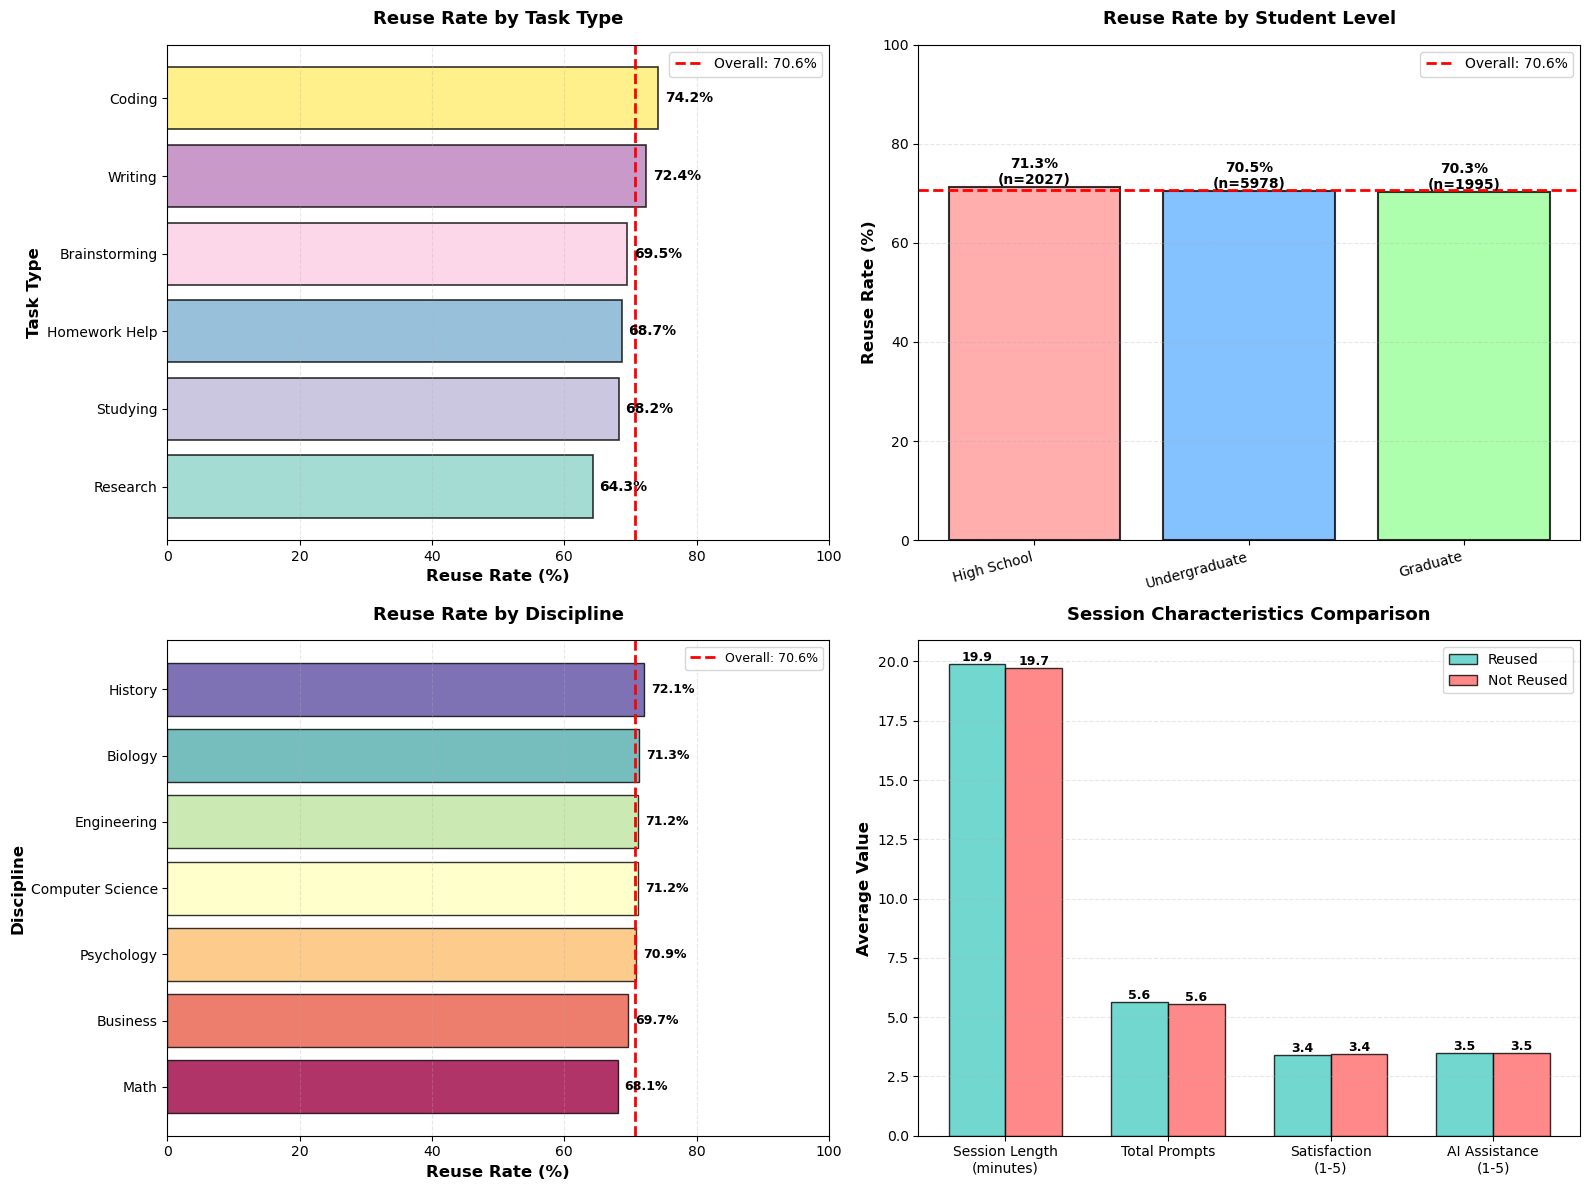

In [27]:
# ============================================================
# Figure 3: Reuse Rate by Task Type, Student Level, Discipline
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: By Task Type
ax = axes[0, 0]
reuse_by_task = df.groupby('TaskType')['UsedAgain'].agg(['sum', 'count'])
reuse_by_task['rate'] = (reuse_by_task['sum'] / reuse_by_task['count'] * 100).round(1)
reuse_by_task = reuse_by_task.sort_values('rate', ascending=True)

colors_task = plt.cm.Set3(np.linspace(0, 1, len(reuse_by_task)))
bars = ax.barh(reuse_by_task.index, reuse_by_task['rate'],
               color=colors_task, edgecolor='black', linewidth=1.2, alpha=0.8)

for bar, idx in zip(bars, reuse_by_task.index):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{reuse_by_task.loc[idx, "rate"]:.1f}%',
            va='center', fontsize=10, weight='bold')

ax.axvline(df['UsedAgain'].mean() * 100, color='red', linestyle='--',
           linewidth=2, label=f'Overall: {df["UsedAgain"].mean()*100:.1f}%')
ax.set_xlabel('Reuse Rate (%)', fontsize=12, weight='bold')
ax.set_ylabel('Task Type', fontsize=12, weight='bold')
ax.set_title('Reuse Rate by Task Type', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_xlim(0, 100)

# Top-right: By Student Level
ax = axes[0, 1]
student_order = ['High School', 'Undergraduate', 'Graduate']
reuse_by_level = df.groupby('StudentLevel')['UsedAgain'].agg(['sum', 'count'])
reuse_by_level['rate'] = (reuse_by_level['sum'] / reuse_by_level['count'] * 100).round(1)
reuse_by_level = reuse_by_level.reindex(student_order)

colors_level = ['#FF9999', '#66B2FF', '#99FF99']
bars = ax.bar(range(len(reuse_by_level)), reuse_by_level['rate'],
              color=colors_level, edgecolor='black', linewidth=1.5, alpha=0.8)

for i, (bar, idx) in enumerate(zip(bars, reuse_by_level.index)):
    height = bar.get_height()
    count = reuse_by_level.loc[idx, 'count']
    rate = reuse_by_level.loc[idx, 'rate']
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate:.1f}%\n(n={count})',
            ha='center', va='bottom', fontsize=10, weight='bold')

ax.axhline(df['UsedAgain'].mean() * 100, color='red', linestyle='--',
           linewidth=2, label=f'Overall: {df["UsedAgain"].mean()*100:.1f}%')
ax.set_xticks(range(len(reuse_by_level)))
ax.set_xticklabels(reuse_by_level.index, rotation=15, ha='right')
ax.set_ylabel('Reuse Rate (%)', fontsize=12, weight='bold')
ax.set_title('Reuse Rate by Student Level', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 100)

# Bottom-left: By Discipline
ax = axes[1, 0]
reuse_by_disc = df.groupby('Discipline')['UsedAgain'].agg(['sum', 'count'])
reuse_by_disc['rate'] = (reuse_by_disc['sum'] / reuse_by_disc['count'] * 100).round(1)
reuse_by_disc = reuse_by_disc.sort_values('rate', ascending=True)

colors_disc = plt.cm.Spectral(np.linspace(0, 1, len(reuse_by_disc)))
bars = ax.barh(reuse_by_disc.index, reuse_by_disc['rate'],
               color=colors_disc, edgecolor='black', linewidth=1, alpha=0.8)

for bar, idx in zip(bars, reuse_by_disc.index):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{reuse_by_disc.loc[idx, "rate"]:.1f}%',
            va='center', fontsize=9, weight='bold')

ax.axvline(df['UsedAgain'].mean() * 100, color='red', linestyle='--',
           linewidth=2, label=f'Overall: {df["UsedAgain"].mean()*100:.1f}%')
ax.set_xlabel('Reuse Rate (%)', fontsize=12, weight='bold')
ax.set_ylabel('Discipline', fontsize=12, weight='bold')
ax.set_title('Reuse Rate by Discipline', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=9)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_xlim(0, 100)

# Bottom-right: Session characteristics
ax = axes[1, 1]
session_chars = pd.DataFrame({
    'Reused': [
        df[df['UsedAgain']==True]['SessionLengthMin'].mean(),
        df[df['UsedAgain']==True]['TotalPrompts'].mean(),
        df[df['UsedAgain']==True]['SatisfactionRating'].mean(),
        df[df['UsedAgain']==True]['AI_AssistanceLevel'].mean()
    ],
    'Not Reused': [
        df[df['UsedAgain']==False]['SessionLengthMin'].mean(),
        df[df['UsedAgain']==False]['TotalPrompts'].mean(),
        df[df['UsedAgain']==False]['SatisfactionRating'].mean(),
        df[df['UsedAgain']==False]['AI_AssistanceLevel'].mean()
    ]
}, index=['Session Length\n(minutes)', 'Total Prompts', 'Satisfaction\n(1-5)', 'AI Assistance\n(1-5)'])

x = np.arange(len(session_chars))
width = 0.35

bars1 = ax.bar(x - width/2, session_chars['Reused'], width,
               label='Reused', color='#4ECDC4', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, session_chars['Not Reused'], width,
               label='Not Reused', color='#FF6B6B', edgecolor='black', alpha=0.8)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9, weight='bold')

ax.set_xticks(x)
ax.set_xticklabels(session_chars.index, fontsize=10)
ax.set_ylabel('Average Value', fontsize=12, weight='bold')
ax.set_title('Session Characteristics Comparison', fontsize=13, weight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

The figure reveals the following findings: 
- The top-left panel demonstrates that task types exert measurable influence on continued AI usage, likely attributable to AI's differential capabilities across domains. For code-related tasks where AI excels, its effective problem-solving tends to yield positive outcomes that reinforce subsequent engagement. Conversely, in research-oriented tasks where AI underperforms, ineffective assistance often generates negative experiences that diminish future usage. 
- The top-right panel indicates negligible differences in continued usage probability across students of varying proficiency levels. 
- The bottom-left panel shows generally comparable AI reuse rates among academic disciplines, with mathematics majors exhibiting marginally lower engagement. 
- The bottom-right panel suggests limited predictive power for variables including dialogue length, prompt formulation, satisfaction metrics, and perceived helpfulness in determining continued AI adoption.